In [31]:
 !pip install dython

In [32]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
from sklearn.neighbors import KNeighborsClassifier
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from statsmodels.genmod.generalized_linear_model import GLM
%matplotlib inline

from dython.nominal import associations
from dython.nominal import correlation_ratio
from dython.nominal import cramers_v


# DATASET DESCRIPTION

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:321: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:321: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


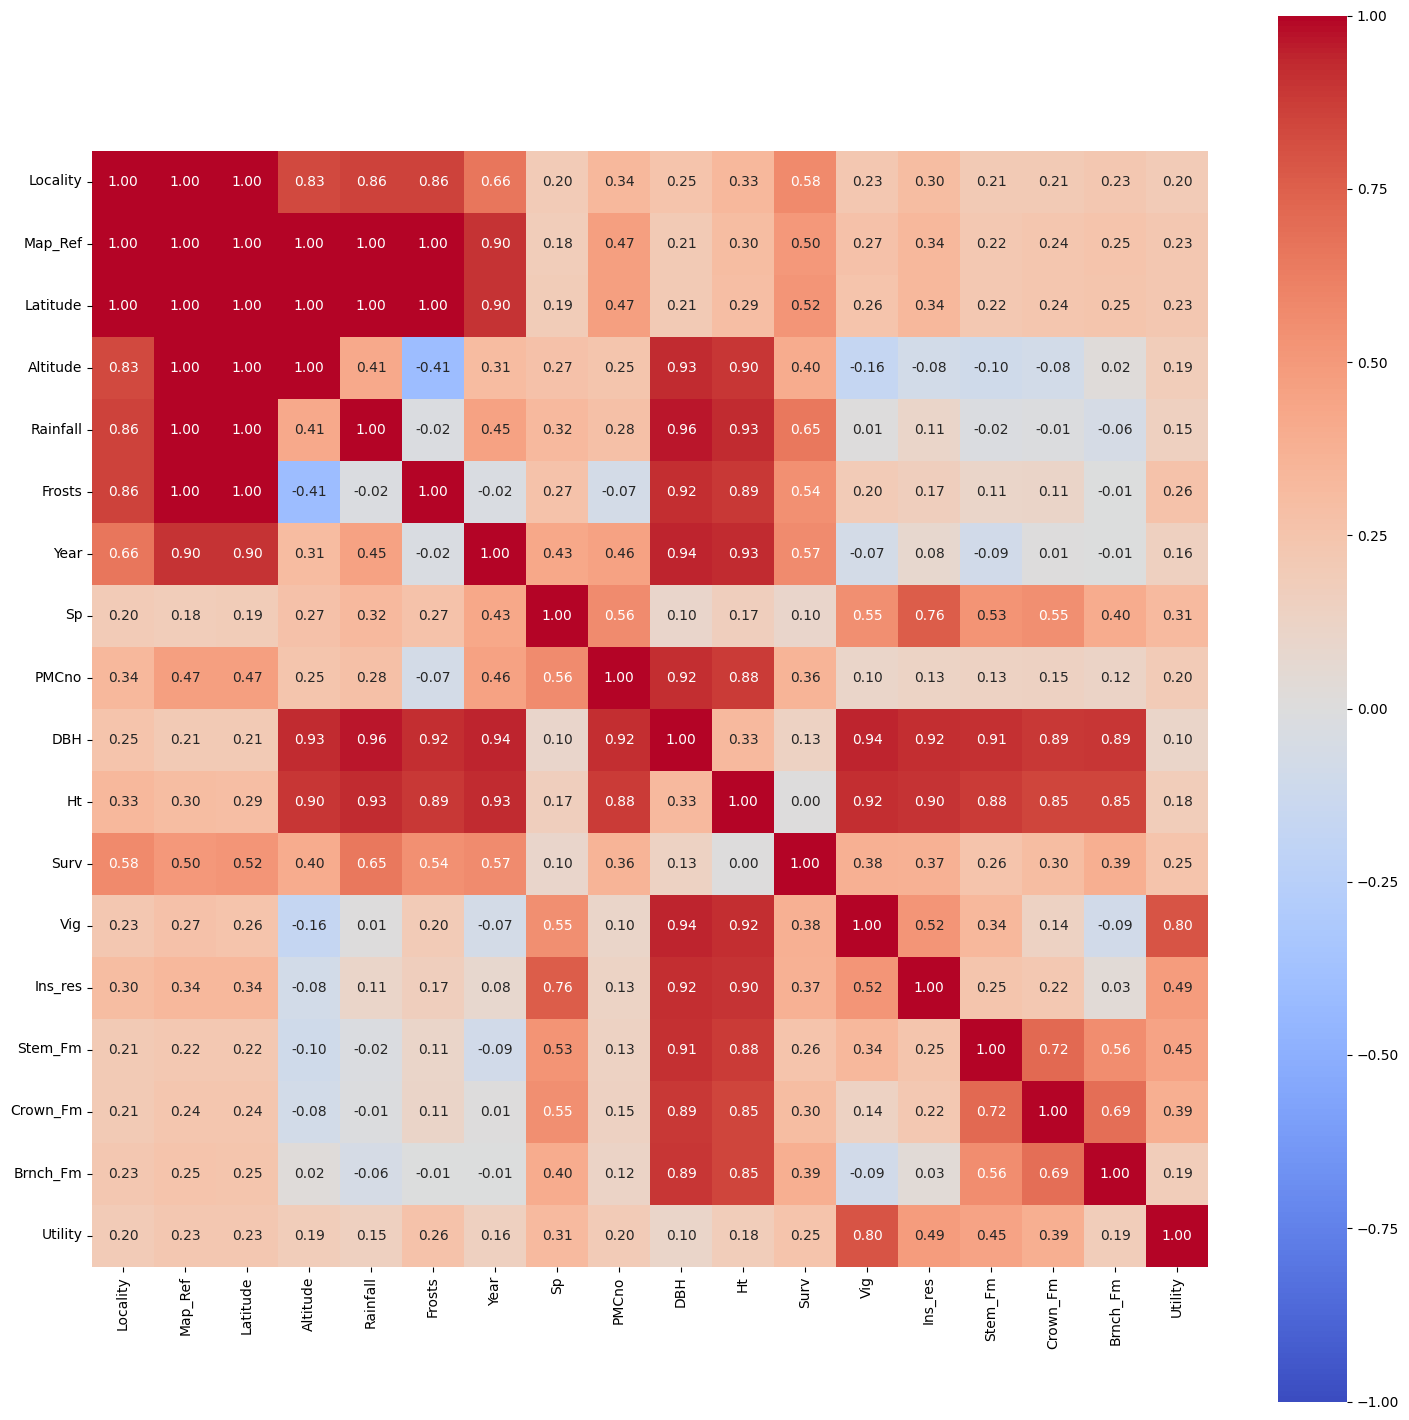

,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
Locality,1.000,0.997,0.998,0.830,0.858,0.859,0.660,0.200,0.336,0.250,0.330,0.577,0.232,0.301,0.209,0.208,0.231,0.202
Map_Ref,0.997,1.000,0.999,1.000,1.000,1.000,0.904,0.184,0.473,0.209,0.302,0.501,0.266,0.335,0.225,0.240,0.250,0.230
Latitude,0.998,0.999,1.000,1.000,1.000,1.000,0.901,0.192,0.469,0.208,0.291,0.519,0.256,0.335,0.220,0.240,0.250,0.230
Altitude,0.830,1.000,1.000,1.000,0.415,-0.409,0.307,0.272,0.248,0.930,0.895,0.400,-0.164,-0.082,-0.100,-0.079,0.022,0.186
Rainfall,0.858,1.000,1.000,0.415,1.000,-0.018,0.454,0.323,0.277,0.962,0.928,0.649,0.007,0.108,-0.018,-0.009,-0.060,0.151
Frosts,0.859,1.000,1.000,-0.409,-0.018,1.000,-0.024,0.265,-0.074,0.918,0.888,0.541,0.200,0.169,0.105,0.111,-0.007,0.262
Year,0.660,0.904,0.901,0.307,0.454,-0.024,1.000,0.425,0.456,0.939,0.925,0.565,-0.072,0.082,-0.088,0.008,-0.008,0.156
Sp,0.200,0.184,0.192,0.272,0.323,0.265,0.425,1.000,0.563,0.097,0.169,0.098,0.553,0.765,0.531,0.551,0.404,0.313
PMCno,0.336,0.473,0.469,0.248,0.277,-0.074,0.456,0.563,1.000,0.920,0.882,0.358,0.105,0.129,0.133,0.145,0.120,0.196
DBH,0.250,0.209,0.208,0.930,0.962,0.918,0.939,0.097,0.920,1.000,0.327,0.134,0.942,0.920,0.908,0.890,0.892,0.105


In [33]:
eucalyptos = pd.read_csv("dataset_eucalyptus_neta.txt", header=0, delimiter=',')
eucalyptos = eucalyptos.drop(columns=['Rep', 'Abbrev'])
output = associations(eucalyptos, nan_strategy='drop_samples', figsize=(18,18), cmap='coolwarm')

correlation = output['corr']
ax = output['ax']

correlation

Vist això, i tenint en compte que tenim moltes variables, per tal de fer els models més simples el que farem és eliminar les variables 'Abbrev and Rep, que fan referència a la site, i la Map ref i l'Latitude, ja que tenen molt poca correlació i segons la localitat ja podrem orientar on estan situades les plantes

In [34]:
eucalyptos = eucalyptos.drop(columns=['Map_Ref', 'Latitude'])
eucalyptos.head()

,Locality,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,Central_Hawkes_Bay,100,850,-2,1980,co,1520,18.45,9.96,40,4.0,3.0,3.5,4.0,3.5,good
1,Central_Hawkes_Bay,100,850,-2,1980,fr,1487,13.15,9.65,90,4.5,4.0,3.5,3.5,3.0,best
2,Central_Hawkes_Bay,100,850,-2,1980,ma,1362,10.32,6.5,50,2.3,2.5,3.0,3.5,3.0,low
3,Central_Hawkes_Bay,100,850,-2,1980,nd,1596,14.8,9.48,70,3.7,3.0,3.3,4.0,3.5,good
4,Central_Hawkes_Bay,100,850,-2,1980,ni,2088,14.5,10.78,90,4.0,2.7,3.3,3.0,3.0,good


In [35]:
eucalyptos.describe()

,Altitude,Rainfall,Frosts,Year,PMCno,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,662.000,662.000,662.000,662.000,662.000,662.000,662.000,662.000,662.000,662.000
mean,174.864,1107.492,-2.650,1981.733,1987.053,3.066,2.893,2.998,3.208,2.847
std,61.651,124.372,0.477,1.039,573.921,1.010,0.818,0.715,0.750,0.785
min,70.000,850.000,-3.000,1980.000,1.000,0.500,0.000,0.000,0.000,0.000
25%,150.000,1000.000,-3.000,1981.000,1521.250,2.500,2.350,2.500,3.000,2.500
50%,180.000,1080.000,-3.000,1982.000,1788.000,3.000,3.000,3.000,3.300,3.000
75%,180.000,1200.000,-2.000,1983.000,2560.000,4.000,3.500,3.500,4.000,3.300
max,300.000,1400.000,-2.000,1983.000,2751.000,5.000,4.500,5.000,5.000,5.000


# DATASET DESCRIPTION

In [36]:
eucalyptos.dtypes

Locality     object
Altitude      int64
Rainfall      int64
Frosts        int64
Year          int64
Sp           object
PMCno         int64
DBH          object
Ht           object
Surv         object
Vig         float64
Ins_res     float64
Stem_Fm     float64
Crown_Fm    float64
Brnch_Fm    float64
Utility      object
dtype: object

<Axes: title={'center': 'Species'}, ylabel='Sp'>

Sp
re     81
nd     70
ov     62
fa     51
fr     51
ob     49
rd     37
ni     30
am     29
pu     29
br     28
co     23
ka     19
bxs    17
sm     14
el     12
cr     11
ag      9
jo      9
si      9
pa      8
nc      6
mn      3
ma      3
ro      2
Name: count, dtype: int64


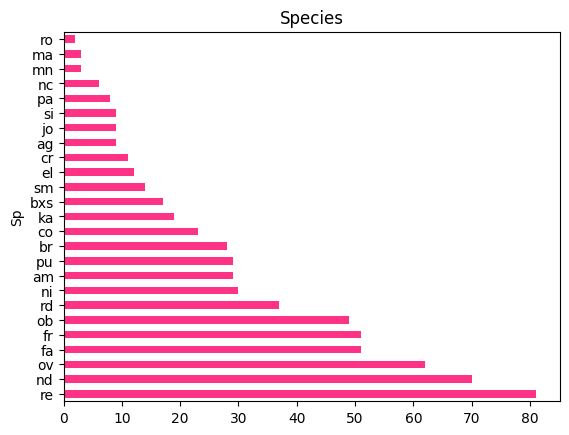

In [37]:
eucalyptos["Sp"].value_counts().plot.barh(title='Species', color = "#FF3386")
print(eucalyptos["Sp"].value_counts())


Observem que hi ha molt desbalanceig de classes a les notres target, diferència de 2 respecte 80 exemples. Per això, només ens quedem amb aquelles que tenim una quantitat superior a 10.

Sp
re     81
nd     70
ov     62
fa     51
fr     51
ob     49
rd     37
ni     30
am     29
pu     29
br     28
co     23
ka     19
bxs    17
sm     14
el     12
cr     11
ag      9
jo      9
si      9
pa      8
nc      6
mn      3
ma      3
ro      2
Name: count, dtype: int64


<Axes: title={'center': 'Species'}, ylabel='Sp'>

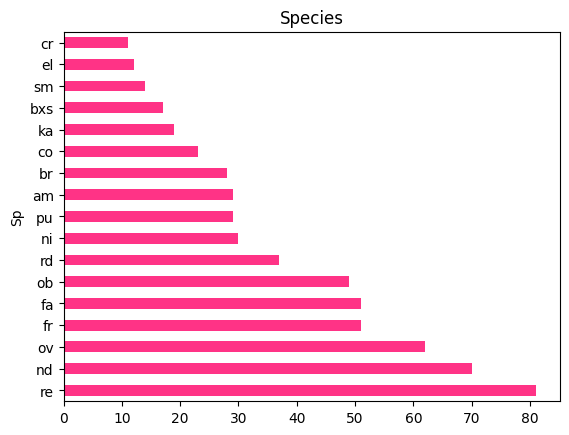

In [38]:
species_counts = eucalyptos['Sp'].value_counts()
species_to_keep = species_counts[species_counts > 10].index

eucalyptos = eucalyptos[eucalyptos['Sp'].isin(species_to_keep)]
print(species_counts)
eucalyptos["Sp"].value_counts().plot.barh(title='Species', color = "#FF3386")

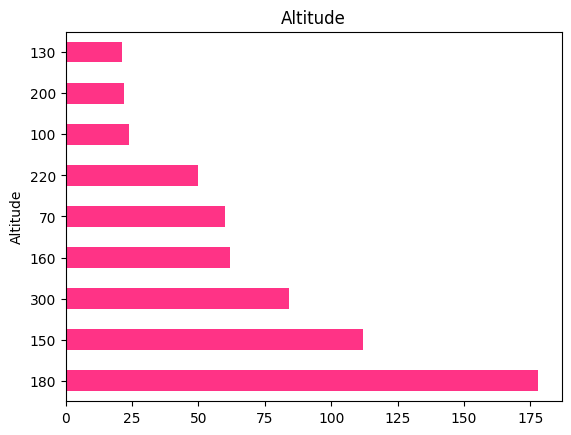

In [39]:
eucalyptos["Altitude"].value_counts().plot.barh(color='#FF3386', title='Altitude');

## MISSING VALUES

We look for missing values:


In [40]:
eucalyptos.shape
(eucalyptos.Locality == '?').value_counts()
(eucalyptos.Altitude == '?').value_counts()
(eucalyptos.Rainfall == '?').value_counts()
(eucalyptos.Frosts == '?').value_counts()
(eucalyptos.Year == '?').value_counts()
(eucalyptos.Sp == '?').value_counts()
(eucalyptos.PMCno == '?').value_counts()
(eucalyptos.DBH == '?').value_counts()
(eucalyptos.Ht == '?').value_counts()
(eucalyptos.Surv == '?').value_counts()
(eucalyptos.Vig == '?').value_counts()
(eucalyptos.Ins_res == '?').value_counts()
(eucalyptos.Stem_Fm == '?').value_counts()
(eucalyptos.Crown_Fm == '?').value_counts()
(eucalyptos.Brnch_Fm == '?').value_counts()
(eucalyptos.Utility == '?').value_counts()

(613, 16)

Locality
False    613
Name: count, dtype: int64

Altitude
False    613
Name: count, dtype: int64

Rainfall
False    613
Name: count, dtype: int64

Frosts
False    613
Name: count, dtype: int64

Year
False    613
Name: count, dtype: int64

Sp
False    613
Name: count, dtype: int64

PMCno
False    613
Name: count, dtype: int64

DBH
False    612
True       1
Name: count, dtype: int64

Ht
False    612
True       1
Name: count, dtype: int64

Surv
False    590
True      23
Name: count, dtype: int64

Vig
False    613
Name: count, dtype: int64

Ins_res
False    613
Name: count, dtype: int64

Stem_Fm
False    613
Name: count, dtype: int64

Crown_Fm
False    613
Name: count, dtype: int64

Brnch_Fm
False    613
Name: count, dtype: int64

Utility
False    613
Name: count, dtype: int64

As DBH and Ht only have one missing value we are going to eliminate that observation globally.

In [41]:
eucalyptos = eucalyptos[(eucalyptos.DBH != '?') & (eucalyptos.Ht != '?')]
eucalyptos.shape

def transform_to_numeric(col_name):
  for value in eucalyptos[col_name]:
      try:
          float(value)
      except ValueError:
          print(f"Cannot convert {value}")
  eucalyptos[col_name] = pd.to_numeric(eucalyptos[col_name], errors='coerce')

transform_to_numeric("DBH")
transform_to_numeric("Ht")

print(eucalyptos['DBH'].dtype)
print(eucalyptos['Ht'].dtype)



(612, 16)

float64
float64


<ipython-input-41-ae9461f7d122>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eucalyptos[col_name] = pd.to_numeric(eucalyptos[col_name], errors='coerce')


We can see that was the same observations that didn't have the DBH and Ht variable. With the survival, as there are 25 samples that does not have this variable we will impute that variable of this samples.

In [42]:
eucalyptos.loc[eucalyptos.Surv == '?', 'Surv'] = np.nan

## FUNCTIONS FOR THE PREPROCESSING

In [43]:
def surv_missing_values(X):
  #identifiquem les files d'aquestes columnes que no tenen NAs
  X_copy = X.copy()
  X_copy.loc[X_copy.Surv == '?', 'Surv'] = np.nan

  # Convertir la columna 'Surv' a tipo float
  X_copy['Surv'] = pd.to_numeric(X_copy['Surv'], errors='coerce')

  # Calcular el promedio de los valores válidos en la columna 'Surv'
  mean_surv = X_copy['Surv'].mean()

  # Rellenar los valores faltantes con el promedio
  X_copy['Surv'].fillna(mean_surv, inplace=True)

  return X_copy

In [44]:
def scaling_data(X, scaler):
  numerical_columns = ["Altitude", "Rainfall", "Frosts", "DBH", "Ht", "Surv", "Vig", "Ins_res", 'Stem_Fm', 'Crown_Fm', 'Brnch_Fm','PMCno']
  X_to_scale = X[numerical_columns]

  if scaler is None:
    #train data
    scaler = StandardScaler()

  # Fit and transform the entire dataset
  X_scaled = scaler.fit_transform(X_to_scale)

  # Update the original DataFrame with the scaled values
  X.loc[:, numerical_columns] = X_scaled

  return X, scaler


In [45]:
def outliers_using_IQR(col_name, X):
  Q1 = X[col_name].quantile(0.25)
  Q3 = X[col_name].quantile(0.75)
  IQR = Q3 - Q1

  small_outliers = X[col_name] < (Q1 - 1.5 * IQR)
  big_outliers = X[col_name] > (Q3 + 1.5 * IQR)

  sum_small_outliers = sum(small_outliers)
  sum_big_outliers = sum(big_outliers)
  print(col_name,"->", "Small outliers:", sum_small_outliers, ", Big outliers: ", sum_big_outliers)

  %matplotlib inline
  fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
  X.boxplot(column= col_name,ax=axes[0],color="#6641F2");
  X.hist(column = col_name, ax=axes[1], color="#CABCFD");
  plt.show()


  #cas amb outliers els imputem
  if sum_small_outliers > 0 or sum_big_outliers > 0:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X.loc[small_outliers, col_name] = lower_bound
    X.loc[big_outliers, col_name] = upper_bound

    #comprovem que s'hagi emputat tot bé
    sum_small_outliers = sum(X[col_name] < (Q1 - 1.5 * IQR))
    sum_big_outliers = sum(X[col_name] > (Q3 + 1.5 * IQR))
    print(col_name,"->", "Small outliers:", sum_small_outliers, ", Big outliers: ", sum_big_outliers)

    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    X.boxplot(column= col_name,ax=axes[0],color="#6641F2");
    X.hist(column = col_name, ax=axes[1], color="#CABCFD");
    plt.show()
  return X[col_name]

In [46]:
def preprocessing_data(X, y, scaler = None):
  X = surv_missing_values(X)
  print('yes')
  numerical_col = ['Altitude', 'Rainfall', 'Frosts', 'DBH', 'Ht', 'Surv', 'Vig', 'Ins_res', 'Stem_Fm', 'Crown_Fm', 'Brnch_Fm','PMCno']
  print('yes')
  for i in range (len(numerical_col)):
    X[numerical_col[i]] = outliers_using_IQR(numerical_col[i], X)
  print('yes')
  X, scaler = scaling_data(X, scaler)
  return X, y, scaler



yes
yes
Altitude -> Small outliers: 47 , Big outliers:  56


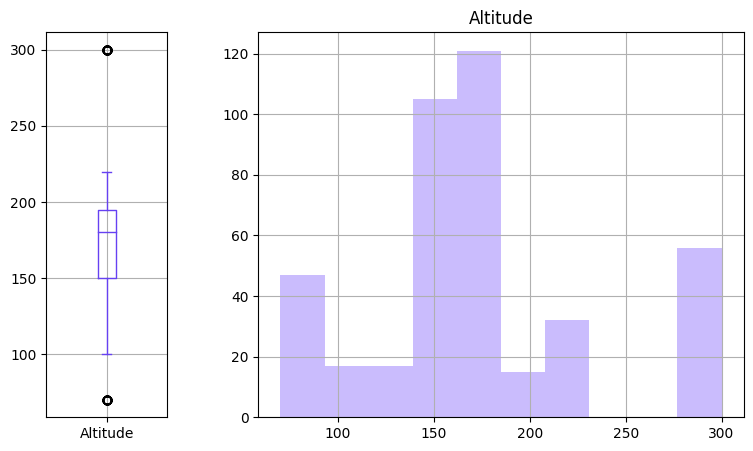

Altitude -> Small outliers: 0 , Big outliers:  0


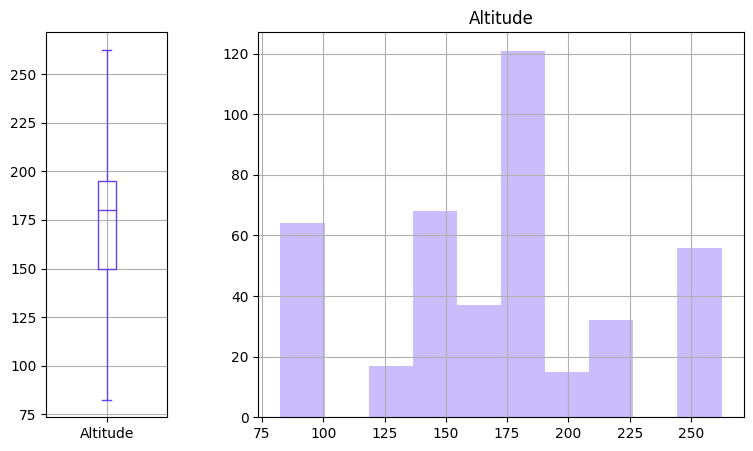

Rainfall -> Small outliers: 0 , Big outliers:  0


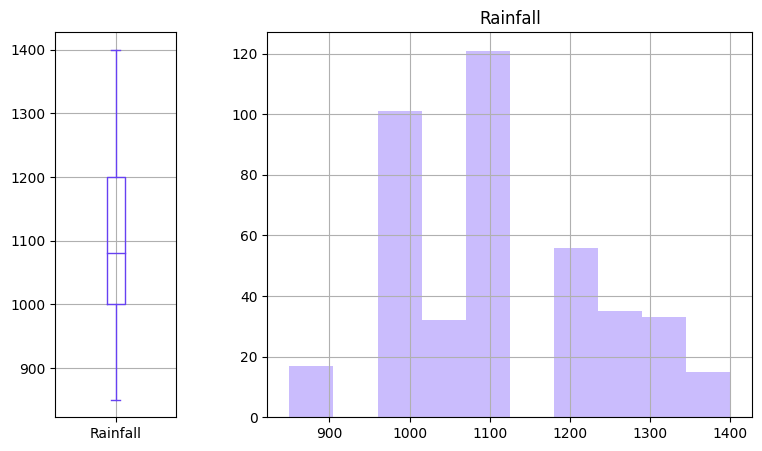

Frosts -> Small outliers: 0 , Big outliers:  0


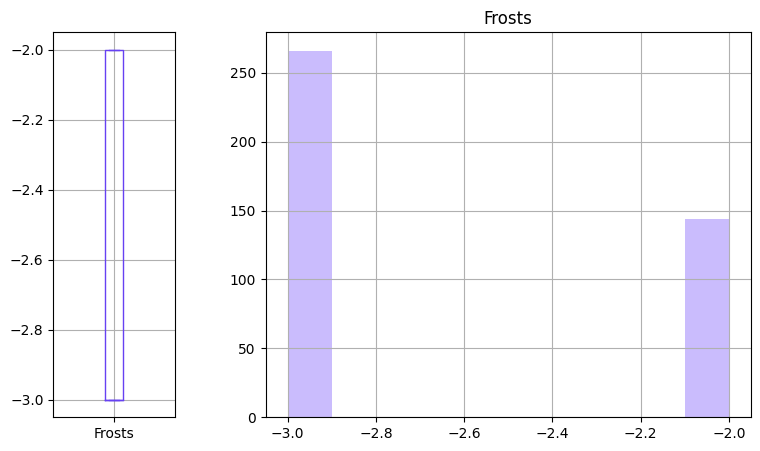

DBH -> Small outliers: 0 , Big outliers:  17


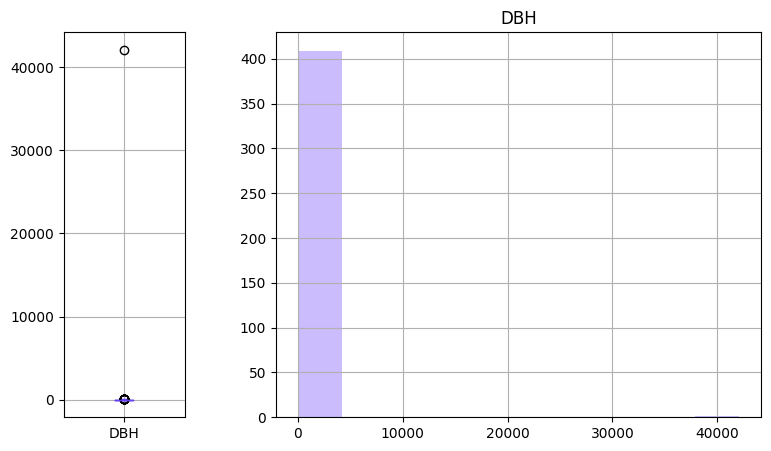

DBH -> Small outliers: 0 , Big outliers:  0


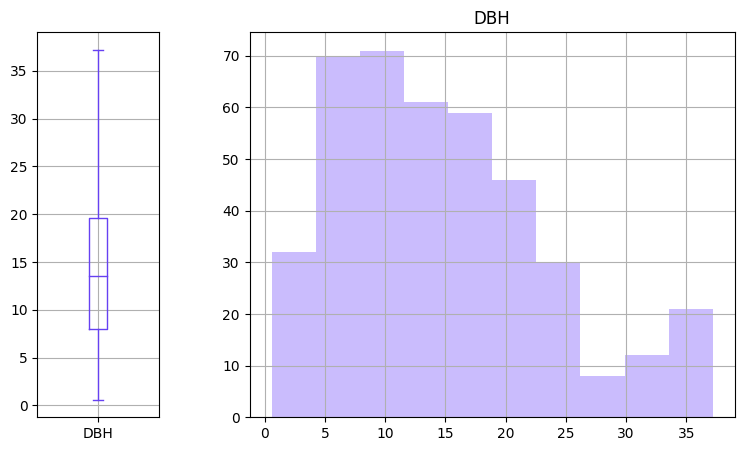

Ht -> Small outliers: 0 , Big outliers:  3


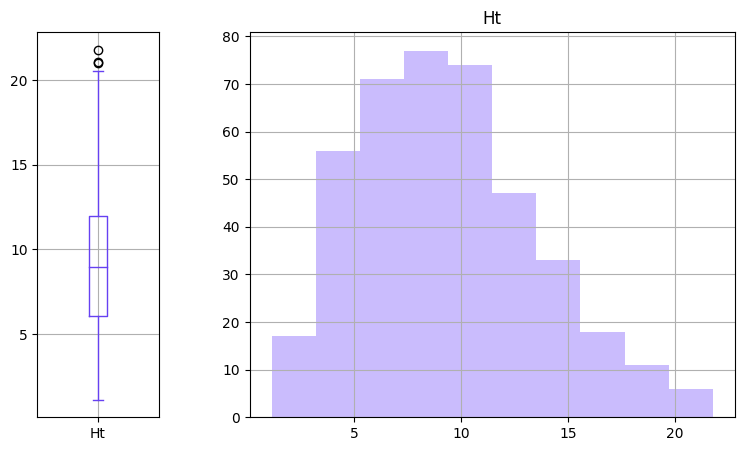

Ht -> Small outliers: 0 , Big outliers:  0


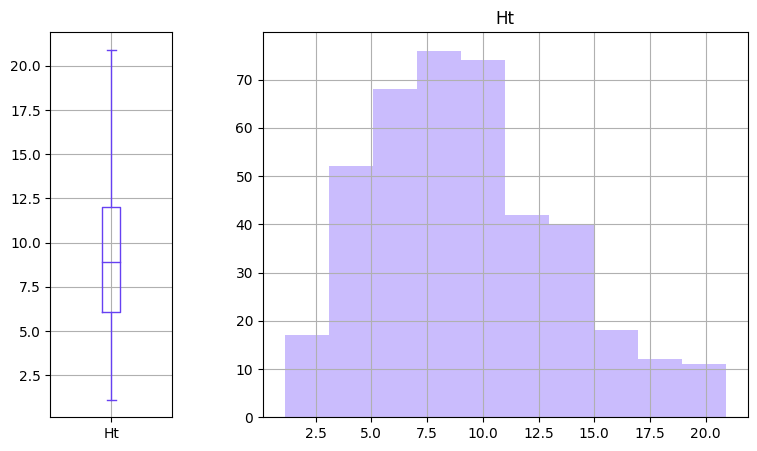

Surv -> Small outliers: 0 , Big outliers:  0


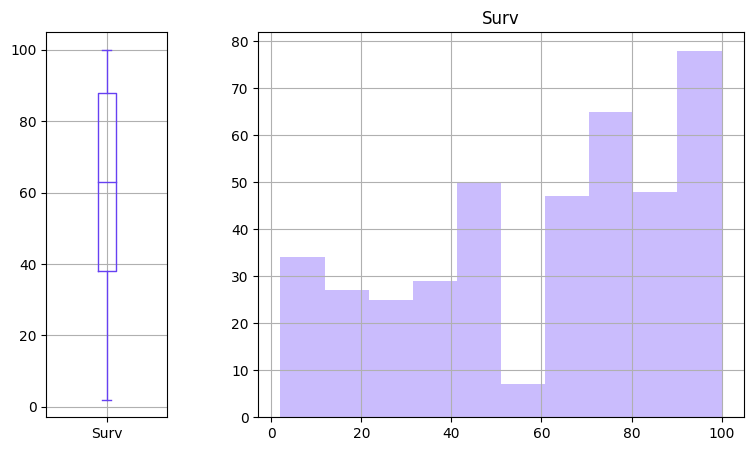

Vig -> Small outliers: 0 , Big outliers:  0


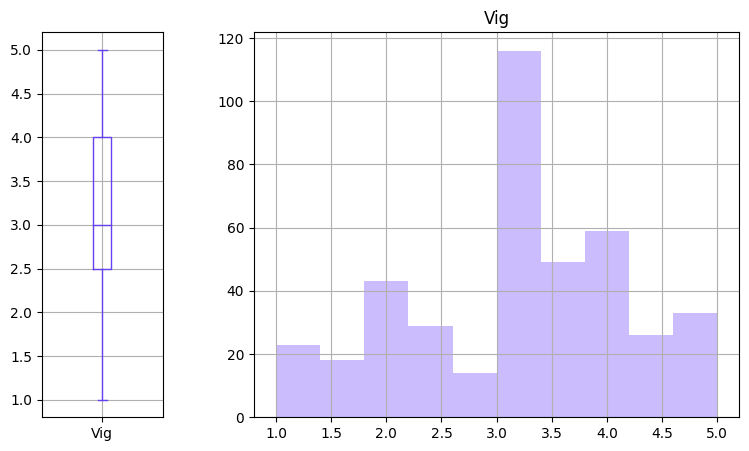

Ins_res -> Small outliers: 0 , Big outliers:  0


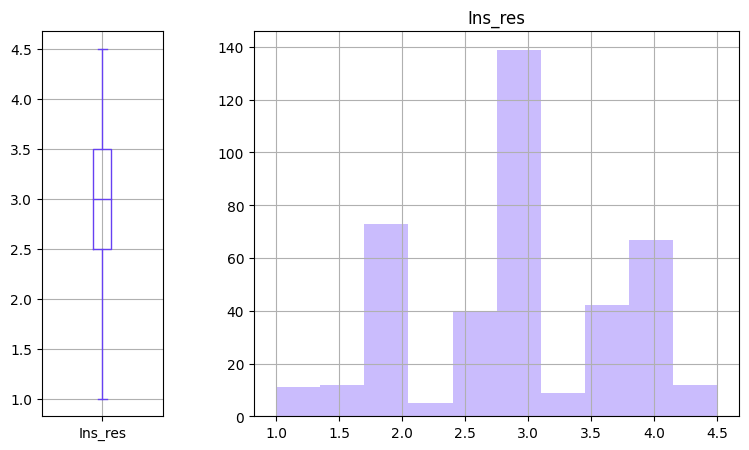

Stem_Fm -> Small outliers: 1 , Big outliers:  0


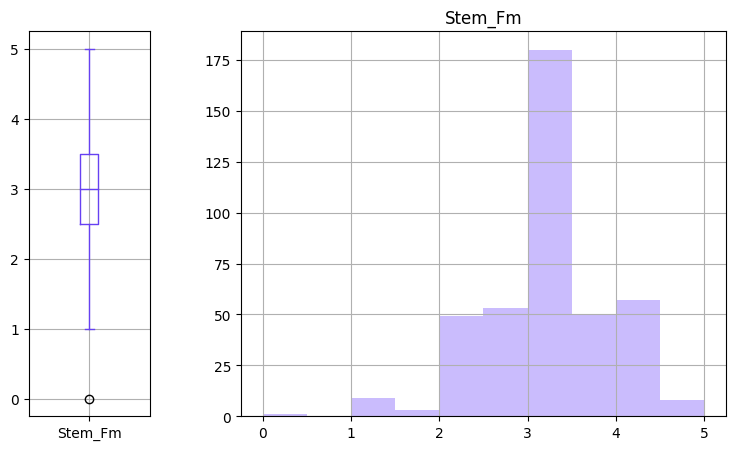

Stem_Fm -> Small outliers: 0 , Big outliers:  0


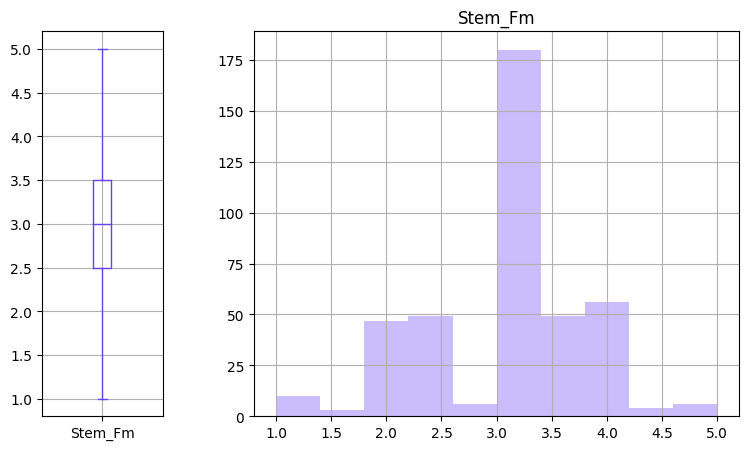

Crown_Fm -> Small outliers: 6 , Big outliers:  0


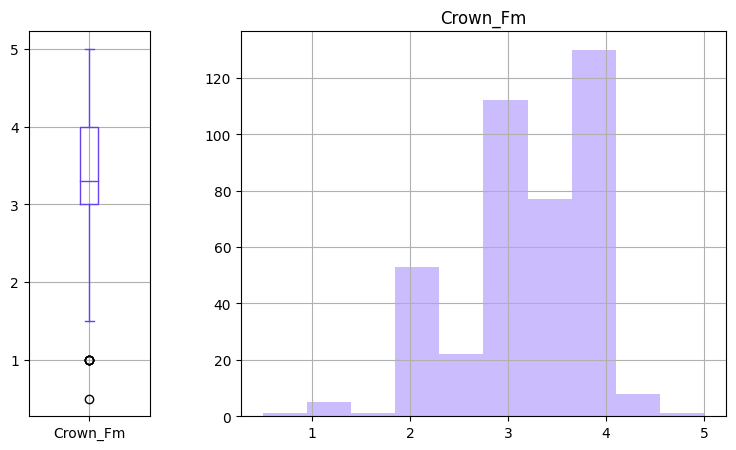

Crown_Fm -> Small outliers: 0 , Big outliers:  0


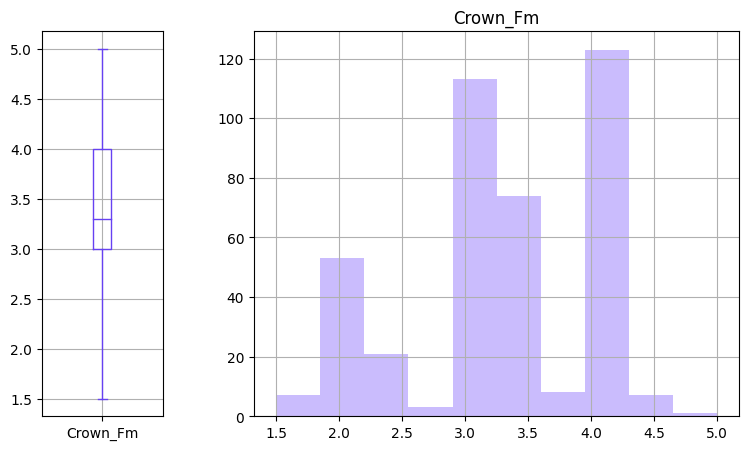

Brnch_Fm -> Small outliers: 17 , Big outliers:  1


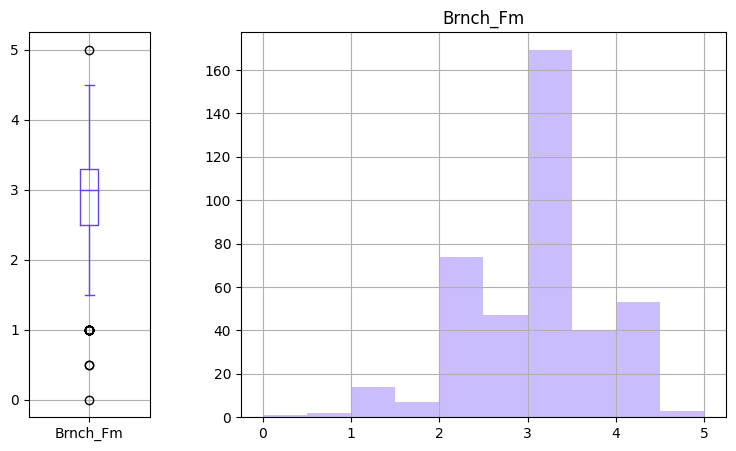

Brnch_Fm -> Small outliers: 0 , Big outliers:  0


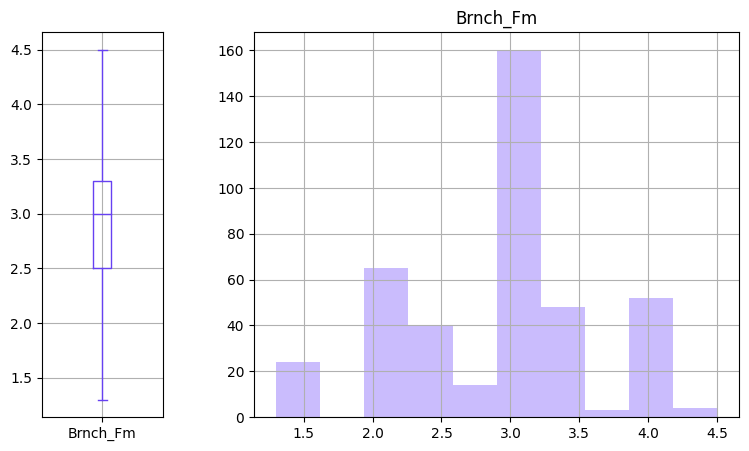

PMCno -> Small outliers: 0 , Big outliers:  0


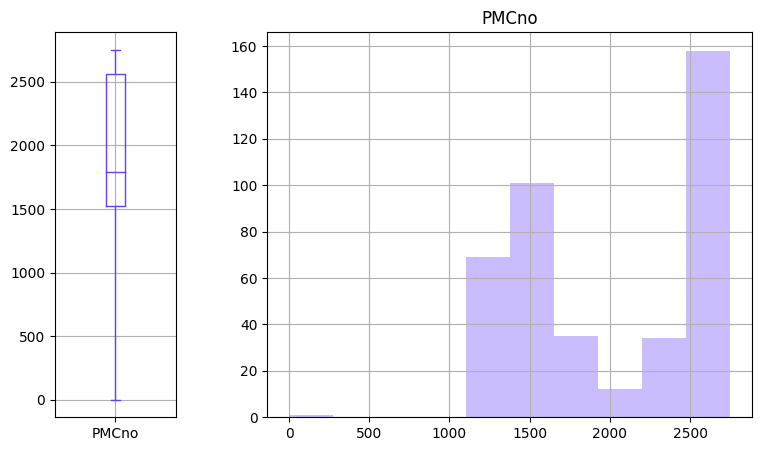

yes
yes
yes
Altitude -> Small outliers: 13 , Big outliers:  28


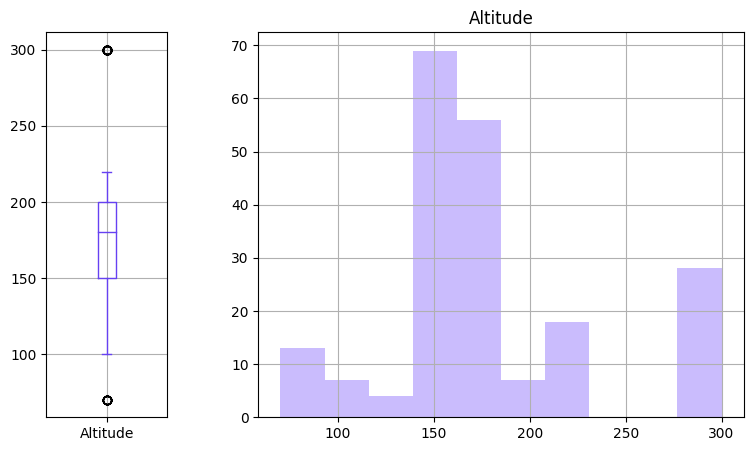

Altitude -> Small outliers: 0 , Big outliers:  0


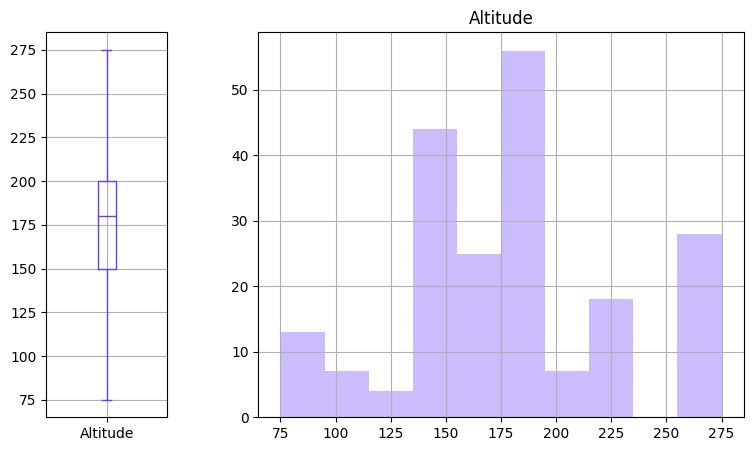

Rainfall -> Small outliers: 0 , Big outliers:  0


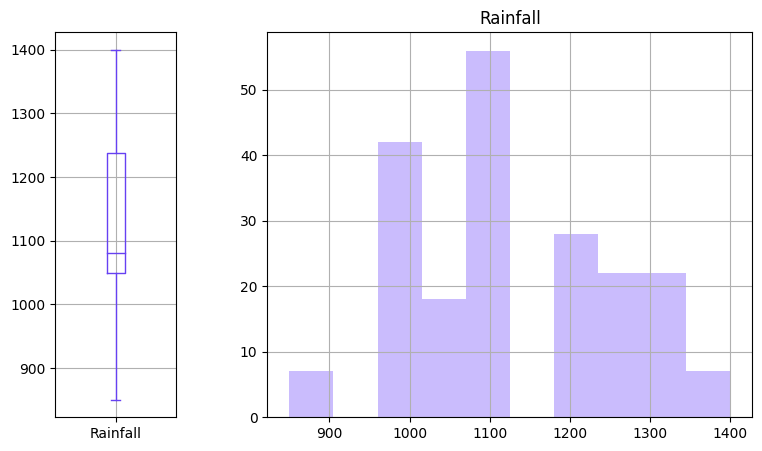

Frosts -> Small outliers: 0 , Big outliers:  0


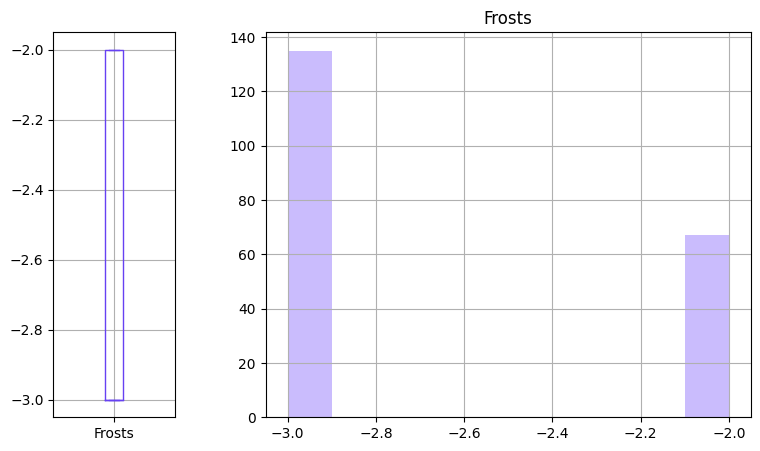

DBH -> Small outliers: 0 , Big outliers:  14


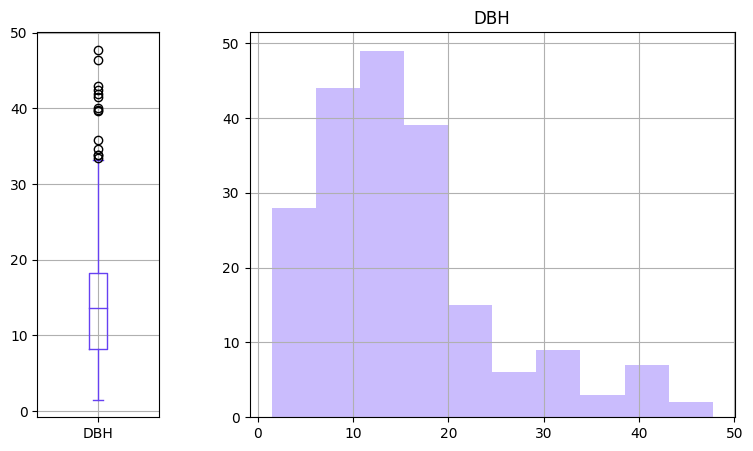

DBH -> Small outliers: 0 , Big outliers:  0


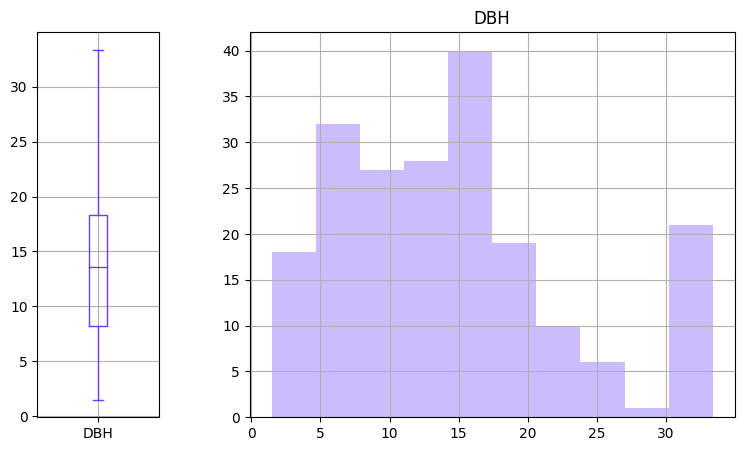

Ht -> Small outliers: 0 , Big outliers:  1


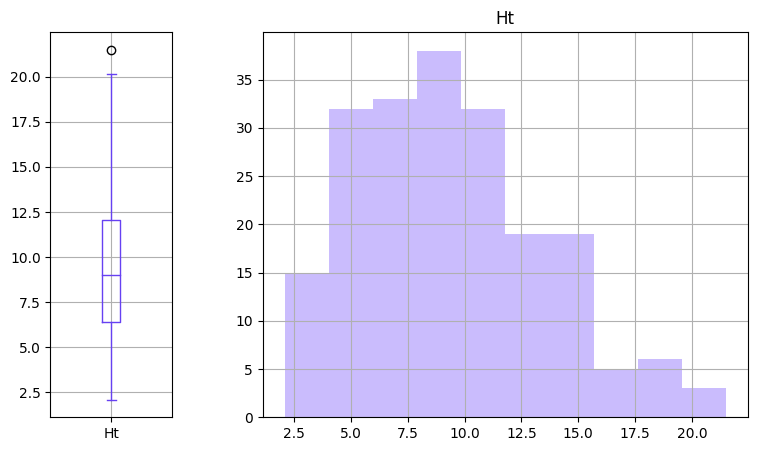

Ht -> Small outliers: 0 , Big outliers:  0


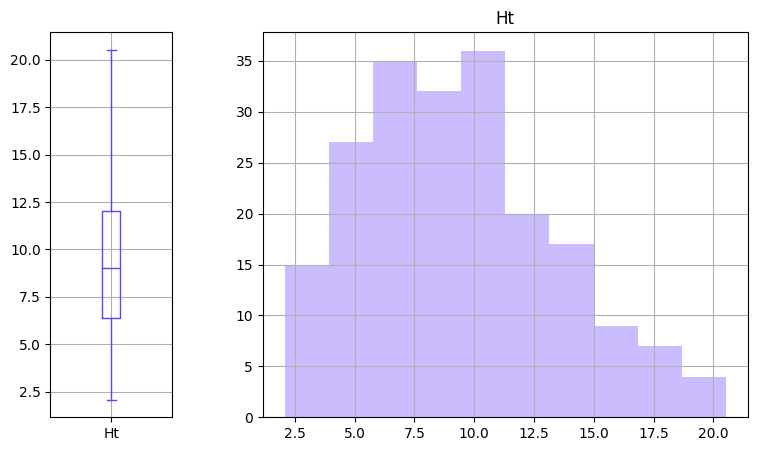

Surv -> Small outliers: 0 , Big outliers:  0


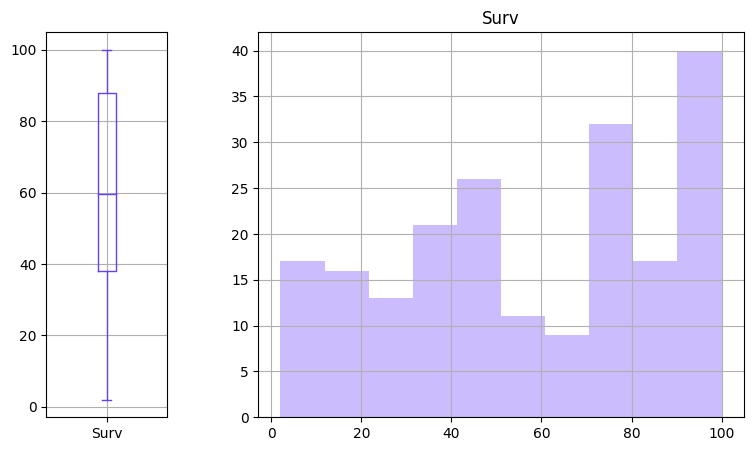

Vig -> Small outliers: 0 , Big outliers:  0


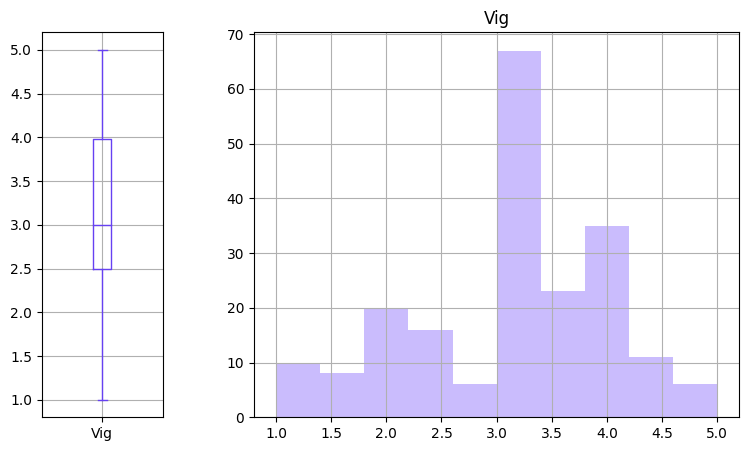

Ins_res -> Small outliers: 1 , Big outliers:  0


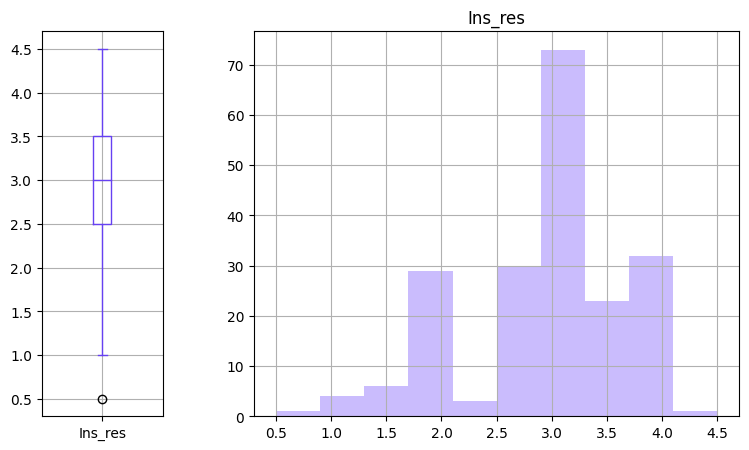

Ins_res -> Small outliers: 0 , Big outliers:  0


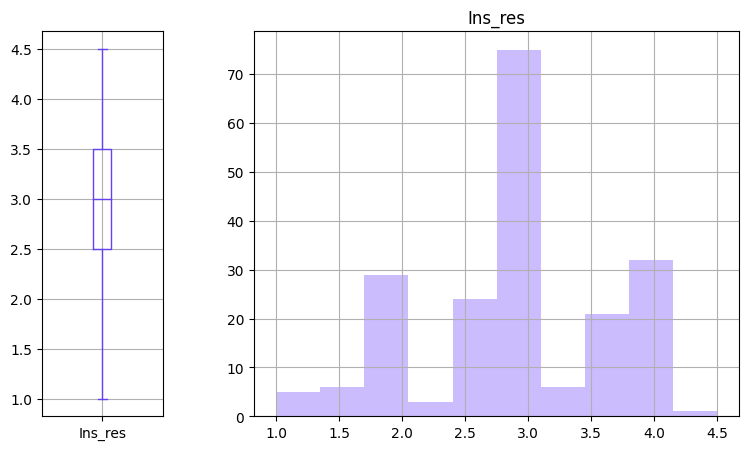

Stem_Fm -> Small outliers: 3 , Big outliers:  1


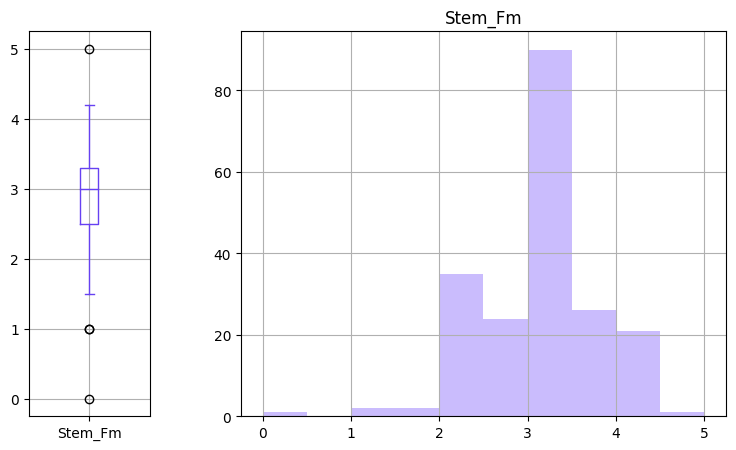

Stem_Fm -> Small outliers: 0 , Big outliers:  0


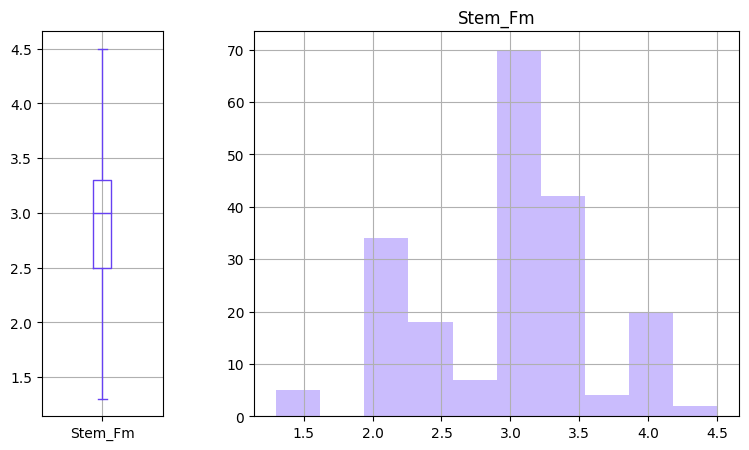

Crown_Fm -> Small outliers: 2 , Big outliers:  0


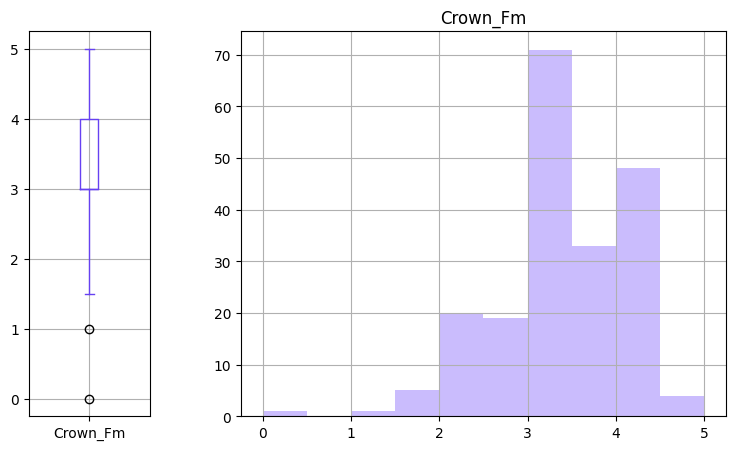

Crown_Fm -> Small outliers: 0 , Big outliers:  0


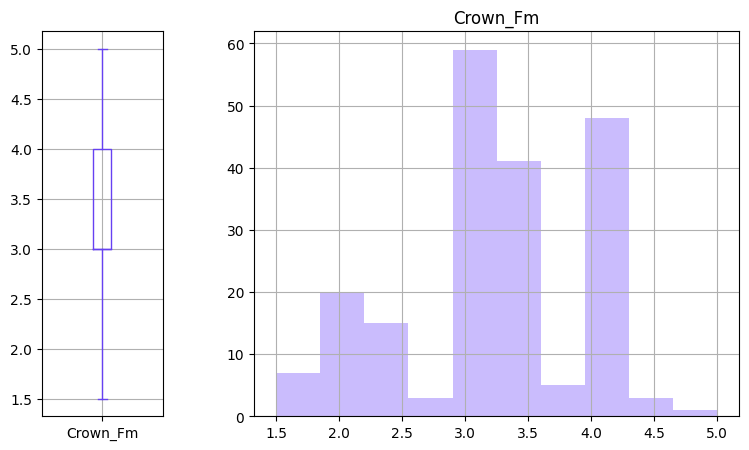

Brnch_Fm -> Small outliers: 10 , Big outliers:  0


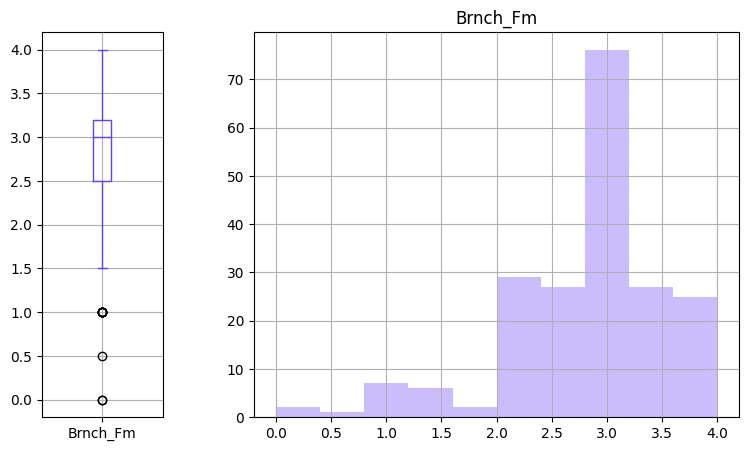

Brnch_Fm -> Small outliers: 0 , Big outliers:  0


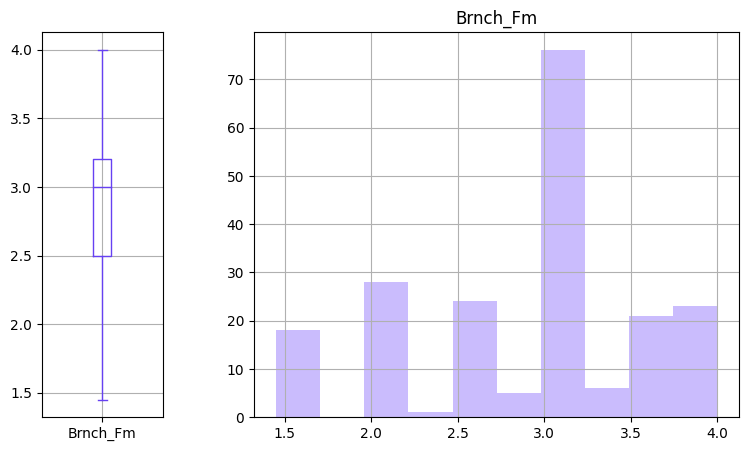

PMCno -> Small outliers: 0 , Big outliers:  0


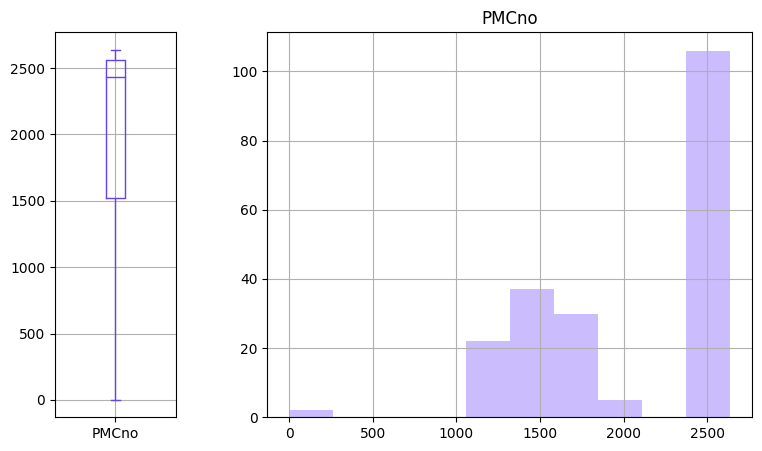

yes


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = eucalyptos.drop(columns =["Sp"])
y = eucalyptos['Sp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

X_train, y_train, scaler  = preprocessing_data(X_train, y_train)
X_test, y_test, _ = preprocessing_data(X_test, y_test)

## DATA VISUALIZATION

<Axes: title={'center': 'Utility'}, ylabel='Utility'>

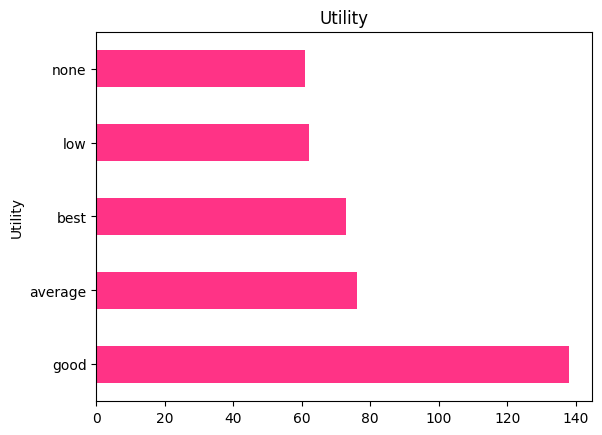

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train["Utility"].value_counts().plot.barh(color="#FF3386", title='Utility');
plt.show()

<Axes: title={'center': 'SP TRAIN'}, ylabel='Sp'>

Text(0.5, 1.0, 'SP TRAIN')

<Axes: title={'center': 'SP TEST'}, ylabel='Sp'>

Text(0.5, 1.0, 'SP TEST')

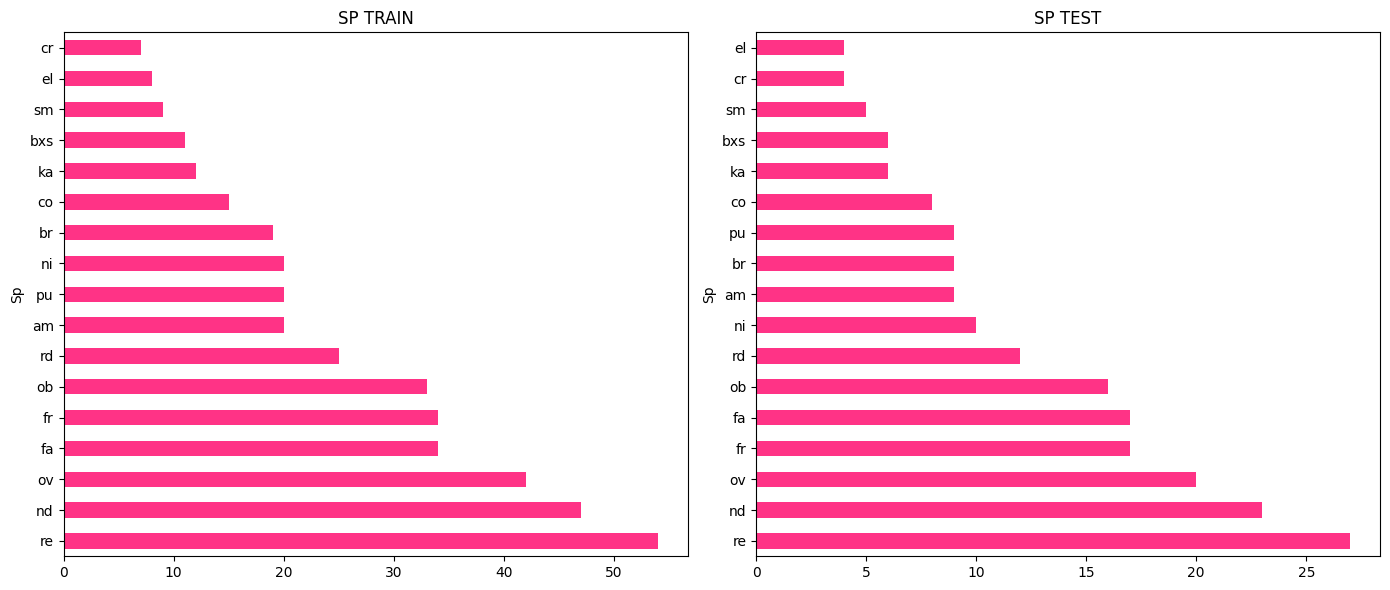

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
y_train.value_counts().plot(kind='barh', ax=axes[0], color='#FF3386', title='SP TRAIN')
axes[0].set_title('SP TRAIN')
y_test.value_counts().plot(kind='barh', ax=axes[1], color='#FF3386', title='SP TEST')
axes[1].set_title('SP TEST')
plt.tight_layout()


In [50]:
Locality_Utility= pd.crosstab(X_train.Locality, X_train.Utility)
Locality_Utility

Utility,average,best,good,low,none
Locality,,,,,
Central_Hawkes_Bay,5,5,6,1,0
Central_Hawkes_Bay_(coastal),3,18,10,12,4
Central_Wairarapa,30,24,26,27,14
Northern_Hawkes_Bay,0,4,7,4,0
South_Wairarapa,23,8,45,14,35
Southern_Hawkes_Bay,10,3,31,2,6
Southern_Hawkes_Bay_(coastal),5,11,13,2,2


<Axes: xlabel='Utility', ylabel='Locality'>

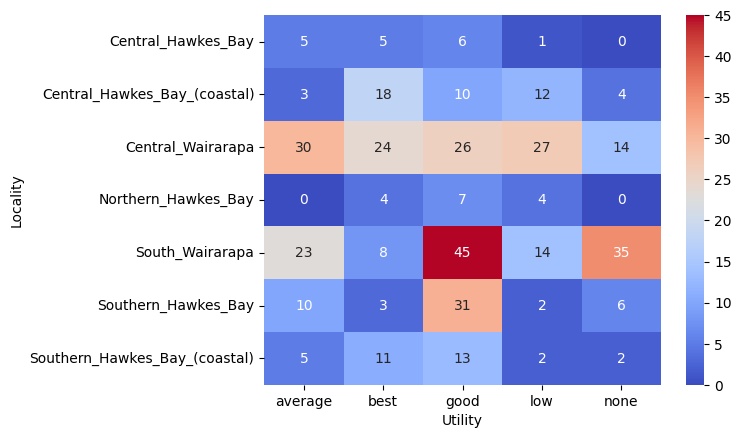

In [51]:
sn.heatmap(Locality_Utility, annot=True, fmt="d", cmap='coolwarm')

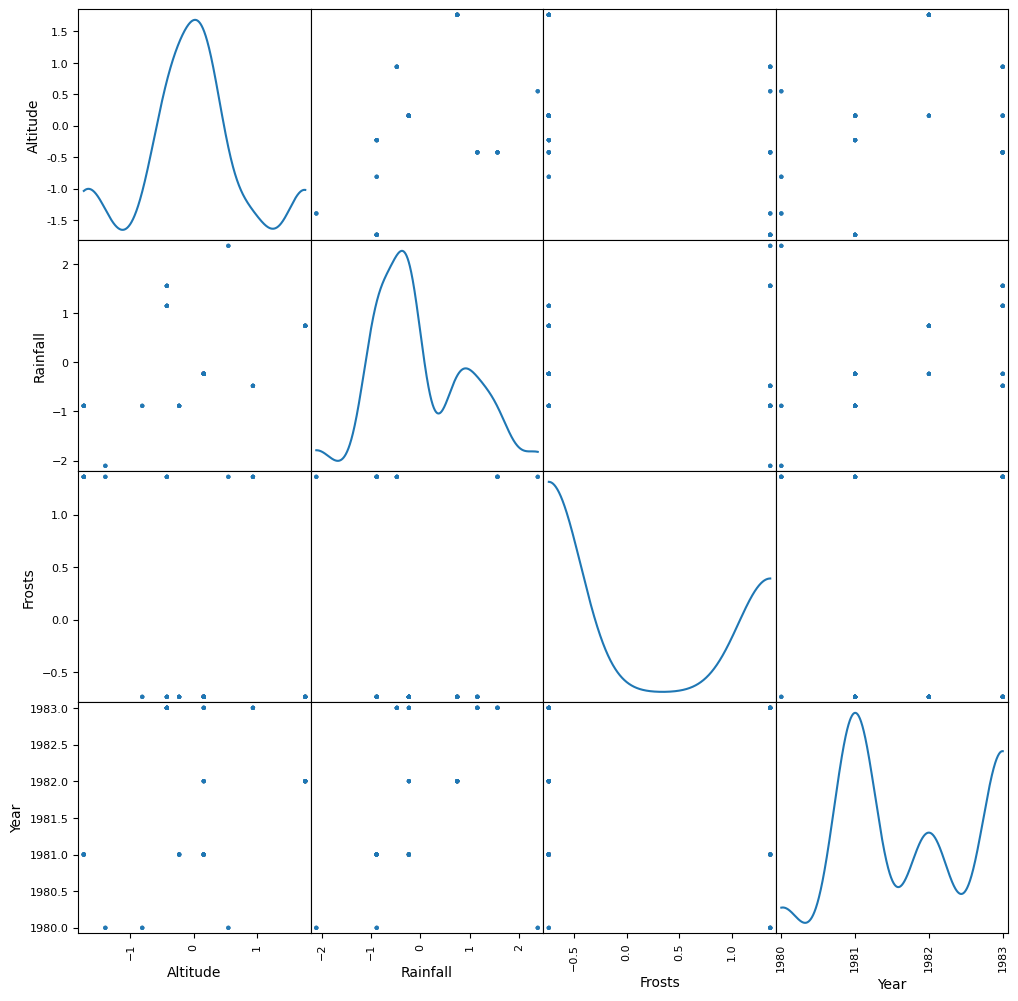

In [52]:
scatter_matrix(X_train.loc[:,['Altitude','Rainfall','Frosts', 'Year']],
               alpha=0.2, figsize=(12, 12),
               diagonal='kde', marker='.');

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Altitude')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Rainfall')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Frosts')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'DBH')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Ht')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Surv')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Vig')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Ins_res')

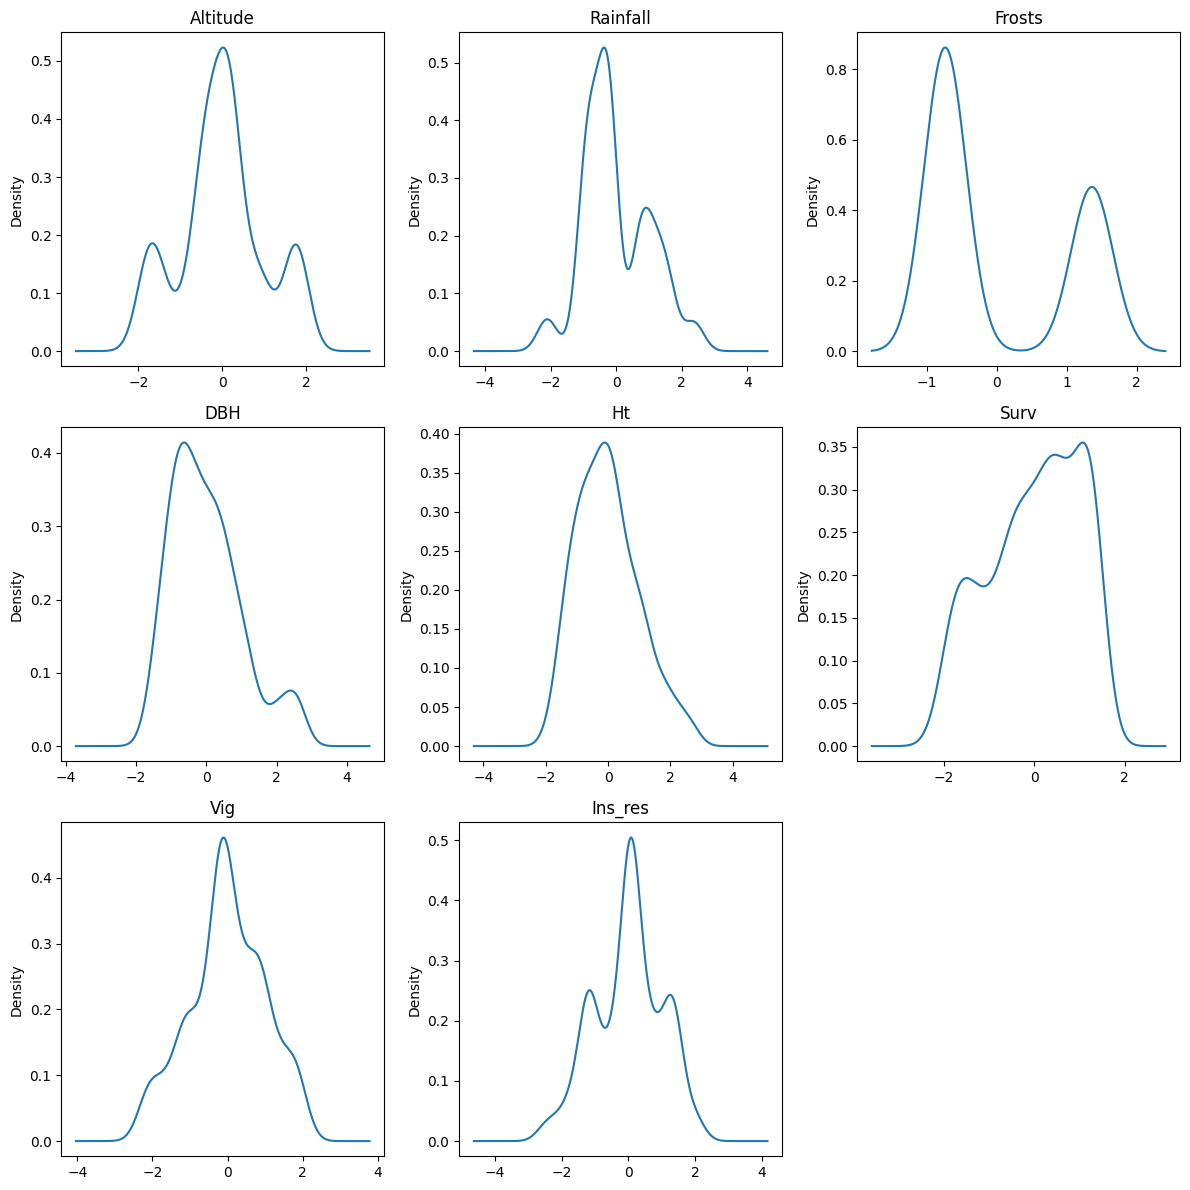

In [53]:
# Selecting the numerical variables
numerical_variables = ["Altitude", "Rainfall", "Frosts", "DBH", "Ht", "Surv", "Vig", "Ins_res"]

# Create the figure
fig = plt.figure(figsize=(12, 12))

# Plot density for each variable
for i, var in enumerate(numerical_variables):
    ax = fig.add_subplot(3, 3, i+1)
    X_train[var].plot.kde()
    plt.title(var)

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()


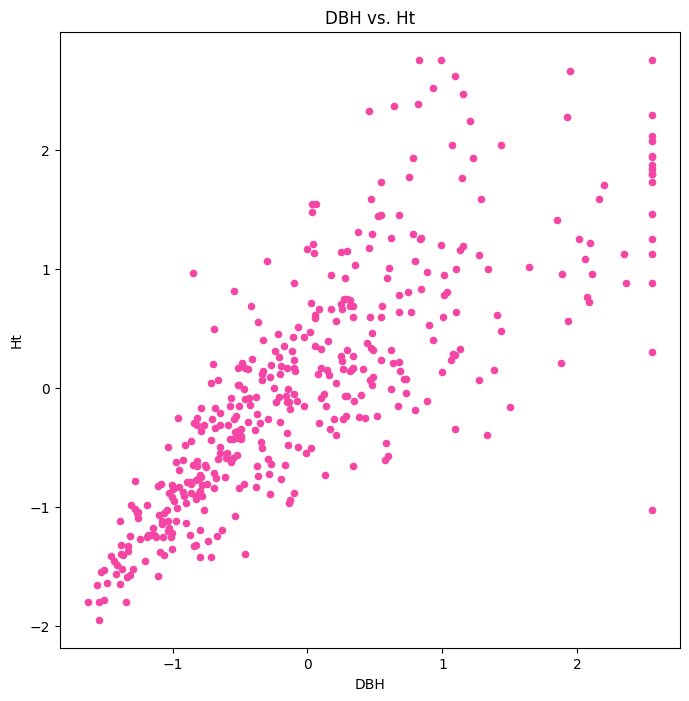

In [54]:
X_train.plot.scatter(y='Ht',
                        x='DBH',
                        figsize=(8,8),
                        title='DBH vs. Ht', color= "#F546A5");

# MODELING

CONVERT DATA


In [55]:
def convert_categorical_data(X):
  X.Utility.replace(["none","low","average","good","best"],
                              [1,2,3,4,5],
                              inplace = True)
  #X.Utility.replace(["co","fr","ma","nd","ni","ob","ov","pu","rd","si","mn","ag","bxs","br","el","fa","jo","ka","re","sm","ro","nc","am","cr","pa","ra","te"],
                              #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], inplace = True)
  X = pd.get_dummies(X, columns = ['Locality'])

  #X = eucalyptos.drop(columns =["Sp"]).to_numpy()
  #y = eucalyptos['Sp'].to_numpy()

  return X

RANDOM FOREST

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from collections import Counter

X_train = convert_categorical_data(X_train)
X_test = convert_categorical_data(X_test)


unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / count for cls, count in class_counts.items()}

# Cross-validate a Random Forest classifier with class weights with n trees
res = {}
for n in np.geomspace(1, 256, num=9, dtype=int):
    clf = RandomForestClassifier(class_weight=class_weights, random_state=42, n_estimators=n)
    res[n] = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro'))

# show results of cross-val
print(Counter(res).most_common())

# select best n
best_n = Counter(res).most_common()[0][0]
print(f'winning hyper-param is n_estimators={best_n}')

# re-fit on training data
clf = RandomForestClassifier(class_weight=class_weights, random_state=42, n_estimators=best_n)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

results_df = pd.DataFrame(columns=['test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro'])

# confusion matrix on test
print("\nConfusion matrix on test set:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report on test set:")
class_report = classification_report(y_test, y_pred, output_dict=True)

results_df.loc["Random_forest_DF"] = [
    class_report['accuracy'],
    class_report['macro avg']['f1-score'],
    class_report['macro avg']['precision'],
    class_report['macro avg']['recall']
]

results_df

[(256, 0.5310047594924191), (63, 0.5015113426828328), (127, 0.49964296758969456), (32, 0.45400970573727567), (16, 0.4179670011865462), (7, 0.3065204359837), (4, 0.2753025912016276), (1, 0.24981092497782562), (2, 0.24440391895369604)]
winning hyper-param is n_estimators=256


RandomForestClassifier(class_weight={'am': 20.5, 'br': 21.57894736842105,
                                     'bxs': 37.27272727272727,
                                     'co': 27.333333333333332,
                                     'cr': 58.57142857142857, 'el': 51.25,
                                     'fa': 12.058823529411764,
                                     'fr': 12.058823529411764,
                                     'ka': 34.166666666666664,
                                     'nd': 8.72340425531915, 'ni': 20.5,
                                     'ob': 12.424242424242424,
                                     'ov': 9.761904761904763, 'pu': 20.5,
                                     'rd': 16.4, 're': 7.592592592592593,
                                     'sm': 45.55555555555556},
                       n_estimators=256, random_state=42)


Confusion matrix on test set:
[[ 4  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0]
 [ 0  1  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  1  0  1  1  1  0  0  1  1  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  2  0  1  0  1  0  0  1  6  0]
 [ 1  0  0  0  0  0  4  4  0  0  0  2  1  1  1  3  0]
 [ 0  1  0  0  0  1  0  0  2  0  0  0  0  0  1  0  1]
 [ 5  0  0  2  0  0  0  2  0 10  0  0  1  0  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  1  0  0  1  2  2  1  2  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 16  0  1  2  0]
 [ 0  0  0  0  0  0  2  1  0  3  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  2  0  0  3  0  4  1  0]
 [ 2  0  0  0  0  0  2  1  0  1  1  0  1  0  1 18  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]]

Classification Report on test set:


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.48,0.503,0.493


RANDOM FOREST

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf_model = RandomForestClassifier(random_state=42)
scoring_dict = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring=scoring_dict,
                           refit='f1_macro',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

#predictions with the best hiperparameters
y_pred = best_model.predict(X_test)

print("\nConfusion matrix on test set:")
print(confusion_matrix(y_test, y_pred))

class_report = classification_report(y_test, y_pred, output_dict=True)

results_df.loc["Random_forest"] = [
    class_report['accuracy'],
    class_report['macro avg']['f1-score'],
    class_report['macro avg']['precision'],
    class_report['macro avg']['recall']
]
results_df


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1_macro',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'})


Confusion matrix on test set:
[[ 6  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  1  0  0  1  1  0  0  1  1  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  2  0  2  1  0  0  0  1  3  0]
 [ 1  0  0  0  0  0  3  4  0  0  0  2  1  2  1  3  0]
 [ 0  1  0  0  0  1  0  0  3  0  0  0  0  0  1  0  0]
 [ 6  0  0  2  0  0  0  2  0  6  0  0  1  2  1  3  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  1  1  0  0  1  2  1  2  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 16  0  1  2  0]
 [ 3  0  0  0  0  0  1  1  0  0  0  2  0  2  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  2  0  0  4  0  4  0  1]
 [ 2  0  0  0  0  0  4  1  0  1  1  0  1  0  1 16  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.48,0.503,0.493
Random_forest,0.495,0.52,0.522,0.546


In [58]:
print(grid_search.best_params_)

{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


<Figure size 1000x700 with 0 Axes>

<Axes: >

Text(0.5, 47.7222222222222, 'Predicted Labels')

Text(95.72222222222221, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

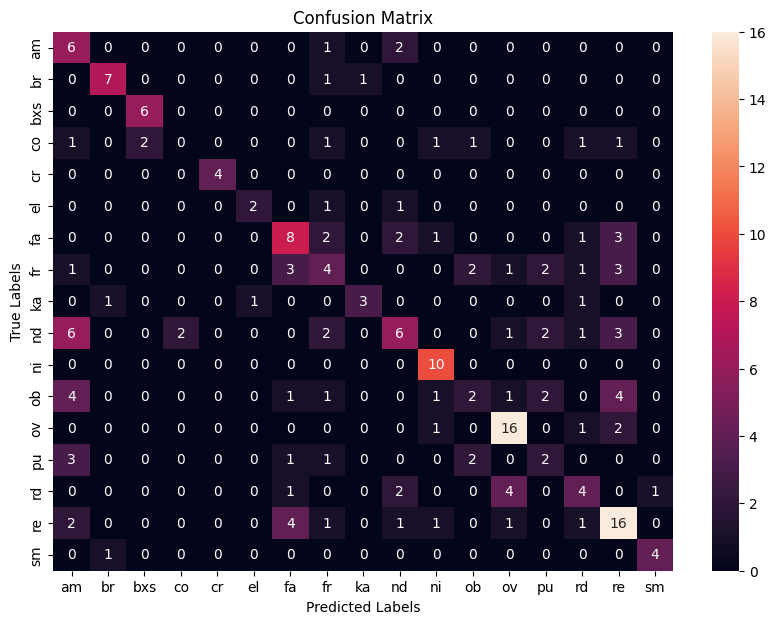

In [61]:
from matplotlib.colors import ListedColormap


pink_cmap = ListedColormap(['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093'])

plt.figure(figsize=(10, 7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split,  KFold, cross_validate


SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# scale data as we are going to use logreg
scaler = RobustScaler().fit(X_train_resampled)
X_train_resampled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

#searching the best classifier
best_clf = grid_search.best_estimator_

#train the best model
best_clf.fit(X_train_resampled, y_train_resampled)

y_pred = best_clf.predict(X_test_scaled)

# Confusion matrix
print("\nConfusion matrix on test set:")
print(confusion_matrix(y_test, y_pred))

# Classificaction
print("\nClassification Report on test set:")

class_report = classification_report(y_test, y_pred, output_dict=True)

results_df.loc["Random_forest with SMOTE"] = [
    class_report['accuracy'],
    class_report['macro avg']['f1-score'],
    class_report['macro avg']['precision'],
    class_report['macro avg']['recall']
]

results_df

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)


Confusion matrix on test set:
[[ 7  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  0  0  0  2  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  5  3  0  2  0  1  0  0  2  3  0]
 [ 1  0  0  0  0  0  4  4  1  0  0  1  0  3  1  2  0]
 [ 0  1  0  0  0  1  0  0  1  0  0  0  0  0  1  0  2]
 [ 5  0  0  2  0  1  0  1  0  6  0  0  1  4  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  2  2  0  0  0  2  0  2  1  3  0]
 [ 0  1  0  0  0  0  0  0  2  0  1  1 12  0  1  2  0]
 [ 3  0  0  0  0  0  2  0  0  1  0  1  0  1  1  0  0]
 [ 0  1  0  0  0  2  0  0  0  1  2  0  2  0  3  0  1]
 [ 3  0  0  0  0  0  4  2  0  0  1  0  1  0  1 15  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]]

Classification Report on test set:


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496


LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

means = pd.DataFrame(lda_model.means_)
means.columns= X_train.columns
means.index = lda_model.classes_

coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X_train.columns
coefs.index = lda_model.classes_

intercepts = pd.DataFrame(lda_model.intercept_)
intercepts.index = lda_model.classes_


print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

X_transformed = lda_model.transform(X_train)

X_transformed = pd.DataFrame(X_transformed)
X_transformed['labels'] = y_train.reset_index(drop=True)
y_pred = lda_model.predict(X_test)

class_report = classification_report(y_test, y_pred, output_dict=True)

results_df.loc["LDA"] = [
    class_report['accuracy'],
    class_report['macro avg']['f1-score'],
    class_report['macro avg']['precision'],
    class_report['macro avg']['recall']
]

results_df

LinearDiscriminantAnalysis()

Explained Variance Ratio


,0
0,4.768e-01
1,1.475e-01
2,1.315e-01
3,7.699e-02
4,5.336e-02
5,3.591e-02
6,2.066e-02
7,1.649e-02
8,1.347e-02
9,9.399e-03


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340


K-NN

In [65]:
from sklearn.model_selection import GridSearchCV, cross_validate
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid={
        'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 50, 100],
        'metric': ['euclidean', 'minkowski', 'manhattan'],
        'weights': ['uniform', 'distance']
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit='f1_macro'
)

knn_cv.fit(X_train, y_train)
results_cv = pd.DataFrame(knn_cv.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 50, 100],
                         'weights': ['uniform', 'distance']},
             refit='f1_macro',
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

In [66]:
cols = ['param_n_neighbors', 'param_metric', 'param_weights',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro',
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_n_neighbors,param_metric,param_weights,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
39,3,manhattan,distance,0.334,0.284,0.303,0.291,0.067,0.074,0.075,0.078
37,1,manhattan,distance,0.339,0.280,0.302,0.289,0.068,0.061,0.061,0.072
36,1,manhattan,uniform,0.339,0.280,0.302,0.289,0.068,0.061,0.061,0.072
19,1,minkowski,distance,0.295,0.275,0.315,0.279,0.037,0.038,0.037,0.049
18,1,minkowski,uniform,0.295,0.275,0.315,0.279,0.037,0.038,0.037,0.049
0,1,euclidean,uniform,0.295,0.275,0.315,0.279,0.037,0.038,0.037,0.049
1,1,euclidean,distance,0.295,0.275,0.315,0.279,0.037,0.038,0.037,0.049
49,30,manhattan,distance,0.310,0.268,0.335,0.268,0.025,0.042,0.060,0.033
45,15,manhattan,distance,0.315,0.267,0.303,0.271,0.043,0.036,0.052,0.037
41,5,manhattan,distance,0.320,0.263,0.270,0.277,0.026,0.021,0.028,0.026


In [67]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights = 'distance')
knn.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(knn , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

results_df.loc['KNN'] = cross_val_results[['test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']].mean().values


results_df


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291


#SVC

Advantage: We can use it with unbalanced data. We can weight the C hyperparameter based on the number of samples of each class, penalyzing this way the majoritary classes.

In [68]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from time import time
from datetime import timedelta

Basic SVC

In [69]:
init_time = time()
svm = SVC()
svm.fit(X_train,y_train)

training_time = time()-init_time
print(timedelta(seconds=training_time))

scores = cross_val_score(svm, X_train, y_train, cv=5)
scores_recall = cross_val_score(svm, X_train, y_train, cv=5,scoring='recall_macro')
scores_f_score = cross_val_score(svm, X_train, y_train, cv=5,scoring='f1_macro')
results_df.loc['SVM-default',:] = [np.mean(scores),np.mean(scores_recall),np.mean(scores_f_score),training_time]
results_df

SVC()

0:00:00.032087


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291
SVM-default,0.132,0.059,0.014,0.032


<Figure size 1000x700 with 0 Axes>

<Axes: >

Text(0.5, 47.7222222222222, 'Predicted Labels')

Text(95.72222222222221, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

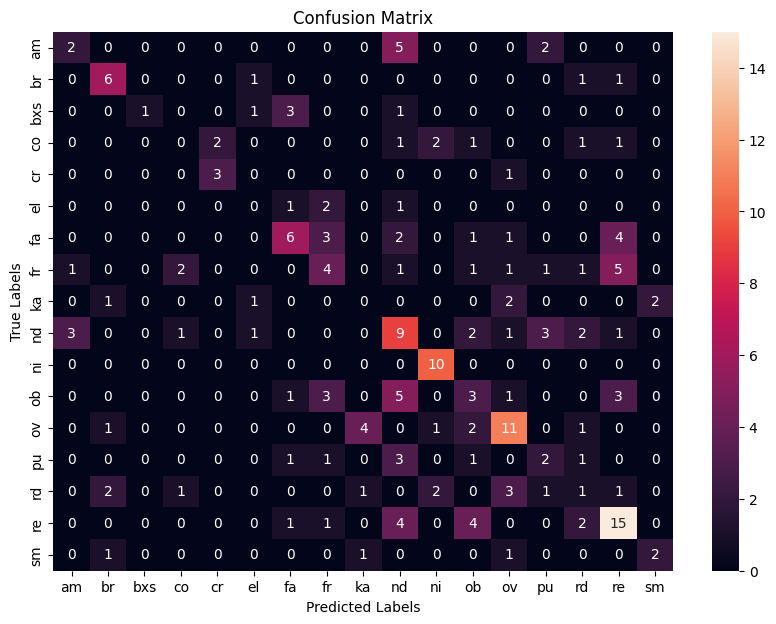

In [74]:
plt.figure(figsize=(10, 7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Now let's see the effect on tuning the hyperparameters on this mode.

In [76]:
init_time = time()

svm = SVC(class_weight='balanced')

kernels = ['linear', 'rbf', 'poly']
Cs = [0.1, 0.001, 0.5, 1, 2, 3, 4, 5, 6, 0.0001]


trc = GridSearchCV(estimator=svm,
                   param_grid={
                       'C': Cs,
                       'kernel': kernels
                   },
                   scoring=['accuracy', 'recall_macro', 'f1_macro'],
                   cv=5,
                   return_train_score=True,
                   refit='f1_macro')

model_5CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time() - init_time)))

model_5CV.best_score_
model_5CV.best_params_

0:00:06.618820


0.3668672444332616

{'C': 0.5, 'kernel': 'linear'}

In [77]:
pd.DataFrame(model_5CV.cv_results_).loc[:, [
    'mean_fit_time',
    'std_fit_time',
    'param_C',
    'param_kernel',
    'mean_test_accuracy',
    'std_test_accuracy',
    'mean_test_recall_macro',
    'std_test_recall_macro',
    'mean_test_f1_macro',
    'std_test_f1_macro',
]].sort_values(by='mean_test_f1_macro',ascending=False)

,mean_fit_time,std_fit_time,param_C,param_kernel,mean_test_accuracy,std_test_accuracy,mean_test_recall_macro,std_test_recall_macro,mean_test_f1_macro,std_test_f1_macro
6,0.019,4.062e-03,0.5,linear,0.378,0.049,0.401,0.073,0.367,0.074
24,0.028,1.173e-03,6,linear,0.368,0.054,0.365,0.064,0.347,0.060
21,0.027,1.374e-03,5,linear,0.366,0.053,0.356,0.075,0.344,0.069
15,0.024,9.056e-04,3,linear,0.361,0.027,0.356,0.051,0.341,0.049
18,0.028,2.847e-03,4,linear,0.354,0.051,0.350,0.068,0.339,0.064
12,0.023,8.751e-04,2,linear,0.356,0.038,0.356,0.060,0.335,0.052
9,0.020,1.190e-03,1,linear,0.354,0.023,0.357,0.035,0.332,0.033
0,0.015,1.302e-03,0.1,linear,0.307,0.040,0.356,0.058,0.310,0.052
19,0.019,6.377e-04,4,rbf,0.124,0.021,0.116,0.006,0.039,0.015
10,0.020,4.997e-04,1,rbf,0.124,0.021,0.116,0.006,0.039,0.015


In [78]:
init_time = time()
svm = SVC(kernel='linear',class_weight='balanced', C=0.5)
svm.fit(X_train,y_train)

training_time = time()-init_time
print(timedelta(seconds=training_time))

scores = cross_val_score(svm, X_train, y_train, cv=5)
scores_recall = cross_val_score(svm, X_train, y_train, cv=5,scoring='recall_macro')
scores_f_score = cross_val_score(svm, X_train, y_train, cv=5,scoring='f1_macro')
results_df.loc['SVM-best',:] = [np.mean(scores),np.mean(scores_recall),np.mean(scores_f_score),training_time]
results_df

SVC(C=0.5, class_weight='balanced', kernel='linear')

0:00:00.041871


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291
SVM-default,0.132,0.059,0.014,0.032
SVM-best,0.378,0.401,0.367,0.042


In [79]:
y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          am       0.38      0.56      0.45         9
          br       0.42      0.56      0.48         9
         bxs       0.83      0.83      0.83         6
          co       0.06      0.12      0.08         8
          cr       1.00      0.50      0.67         4
          el       0.00      0.00      0.00         4
          fa       0.30      0.18      0.22        17
          fr       0.25      0.24      0.24        17
          ka       0.09      0.17      0.12         6
          nd       0.33      0.13      0.19        23
          ni       0.42      0.80      0.55        10
          ob       0.20      0.19      0.19        16
          ov       0.71      0.25      0.37        20
          pu       0.29      0.22      0.25         9
          rd       0.29      0.33      0.31        12
          re       0.50      0.48      0.49        27
          sm       0.43      0.60      0.50         5

    accuracy              

# **POSSIBLE IMPROVEMENT: CONSIDERING THE CLASSES LOWER THAN 10 OBSERVATIONS AS A CLASS 'OTHERS'**

In [80]:
eucalyptos_2 = pd.read_csv("dataset_eucalyptus_neta.txt", header=0, delimiter=',')
eucalyptos_2 = eucalyptos_2.drop(columns=['Rep', 'Abbrev','Map_Ref', 'Latitude'])
eucalyptos_2 = eucalyptos_2[(eucalyptos_2.DBH != '?') & (eucalyptos_2.Ht != '?')]

def transform_to_numeric(col_name):
  for value in eucalyptos_2[col_name]:
      try:
          float(value)
      except ValueError:
          print(f"Cannot convert {value}")
  eucalyptos_2[col_name] = pd.to_numeric(eucalyptos_2[col_name], errors='coerce')

transform_to_numeric("DBH")
transform_to_numeric("Ht")

eucalyptos_2.loc[eucalyptos_2.Surv == '?', 'Surv'] = np.nan

count_values = eucalyptos_2['Sp'].value_counts()
less_common_species = count_values[count_values < 10].index
eucalyptos_2.loc[eucalyptos_2['Sp'].isin(less_common_species), 'Sp'] = 'others'
eucalyptos_2.dtypes
X_2 = eucalyptos_2.drop(columns=["Sp"])

y_2 = eucalyptos_2['Sp']

Locality     object
Altitude      int64
Rainfall      int64
Frosts        int64
Year          int64
Sp           object
PMCno         int64
DBH         float64
Ht          float64
Surv         object
Vig         float64
Ins_res     float64
Stem_Fm     float64
Crown_Fm    float64
Brnch_Fm    float64
Utility      object
dtype: object

yes
yes
Altitude -> Small outliers: 52 , Big outliers:  58


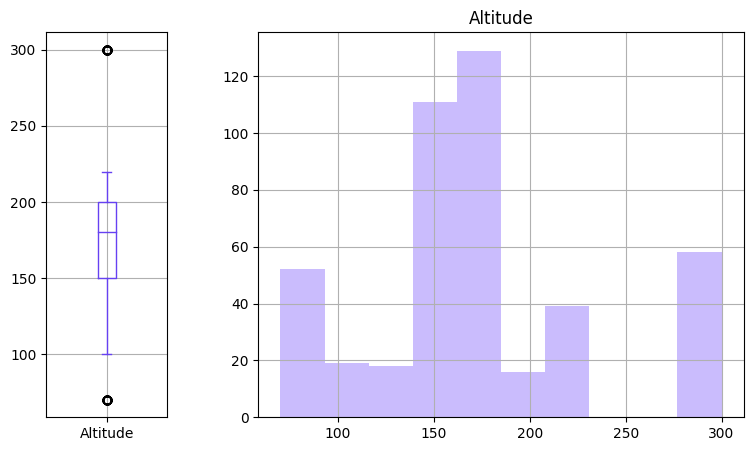

Altitude -> Small outliers: 0 , Big outliers:  0


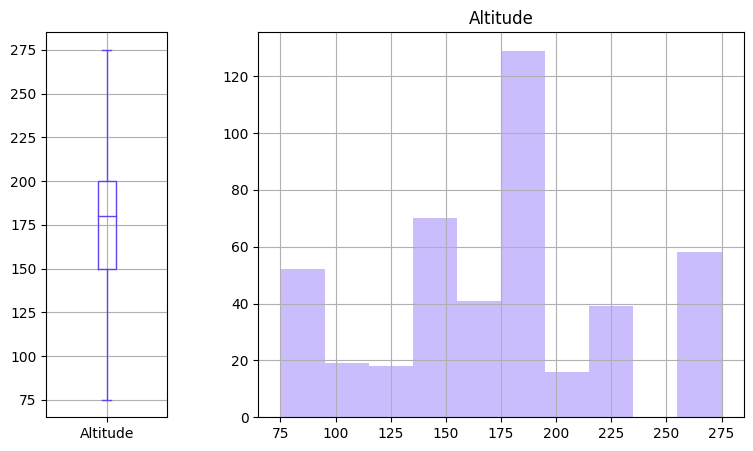

Rainfall -> Small outliers: 0 , Big outliers:  0


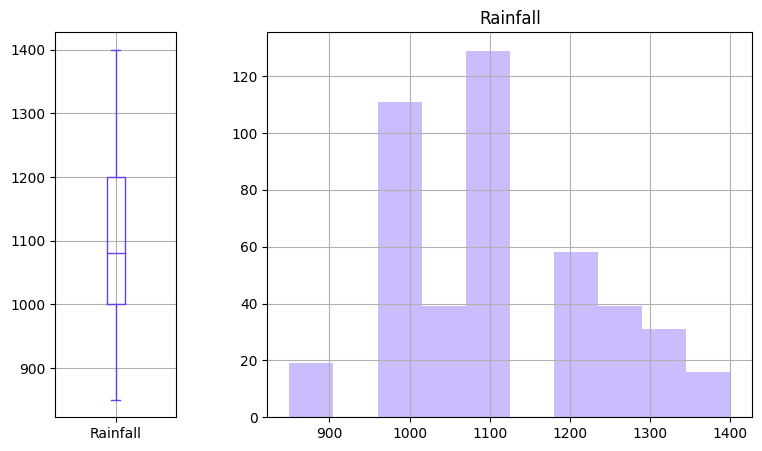

Frosts -> Small outliers: 0 , Big outliers:  0


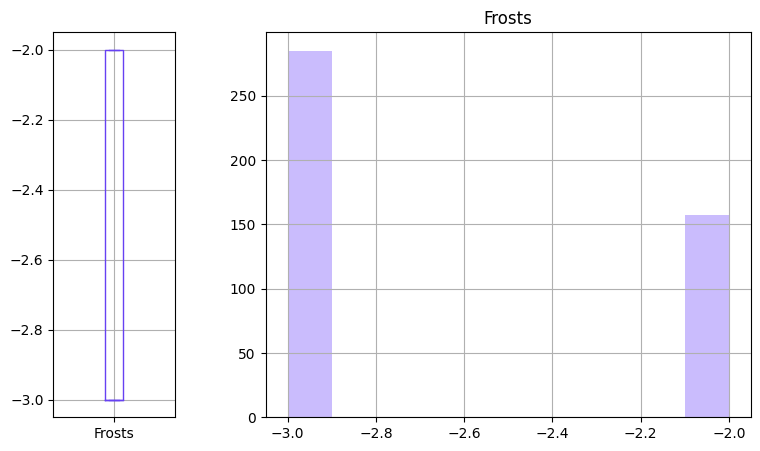

DBH -> Small outliers: 0 , Big outliers:  17


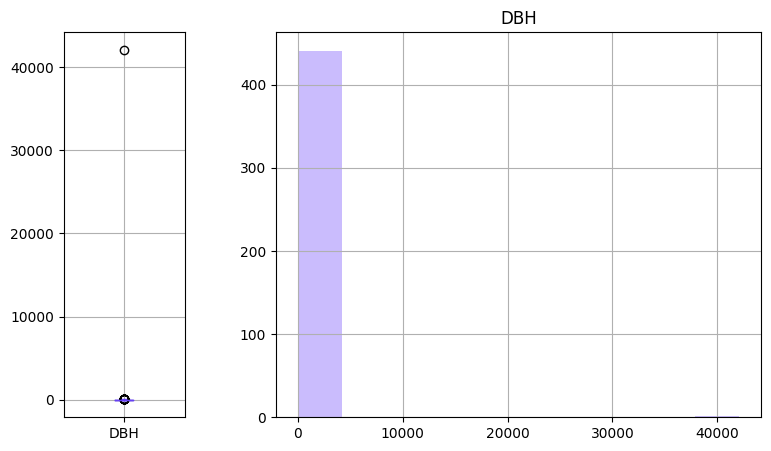

DBH -> Small outliers: 0 , Big outliers:  0


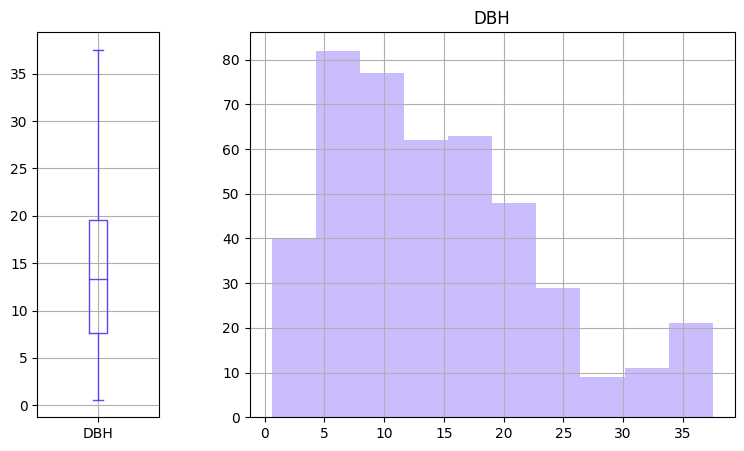

Ht -> Small outliers: 0 , Big outliers:  2


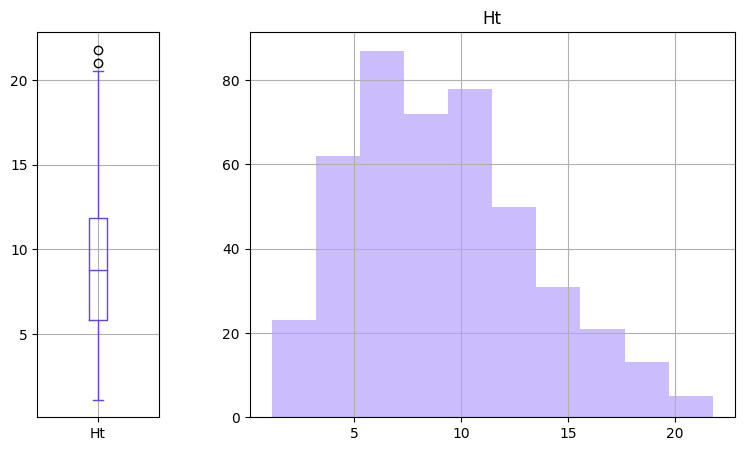

Ht -> Small outliers: 0 , Big outliers:  0


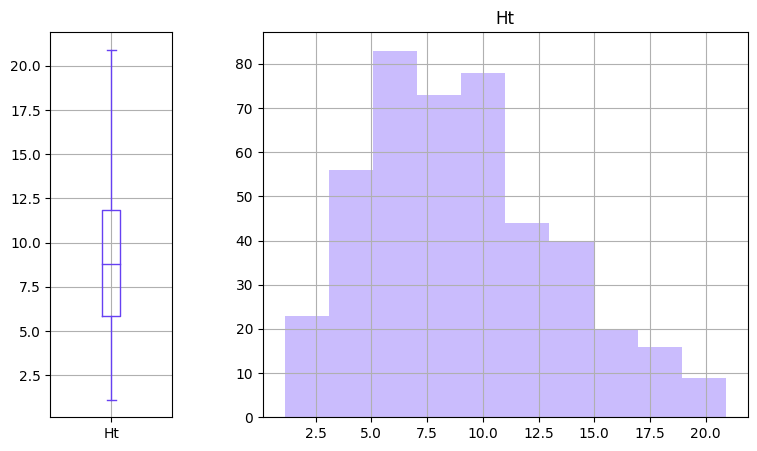

Surv -> Small outliers: 0 , Big outliers:  0


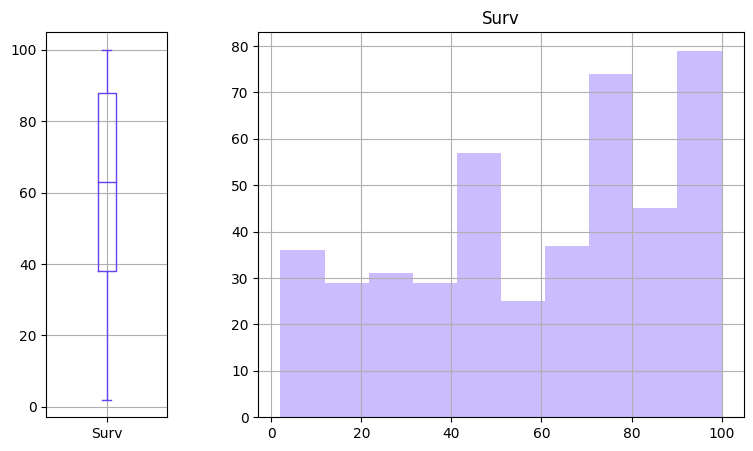

Vig -> Small outliers: 0 , Big outliers:  0


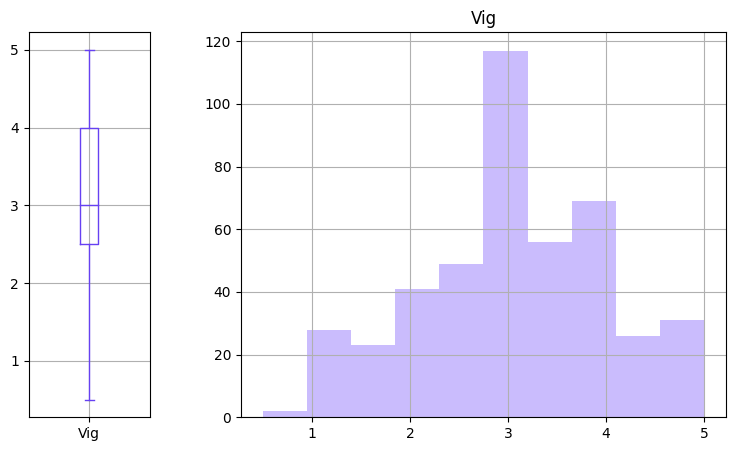

Ins_res -> Small outliers: 2 , Big outliers:  0


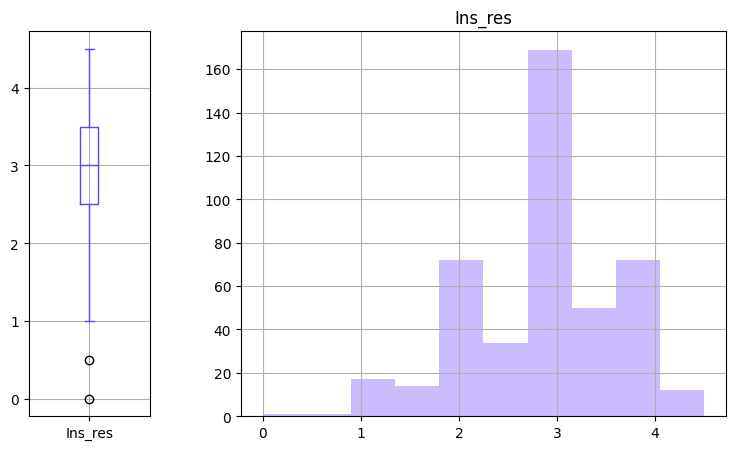

Ins_res -> Small outliers: 0 , Big outliers:  0


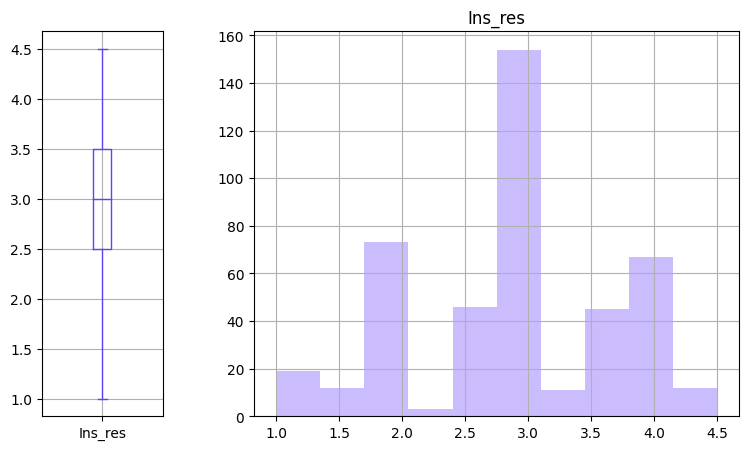

Stem_Fm -> Small outliers: 1 , Big outliers:  0


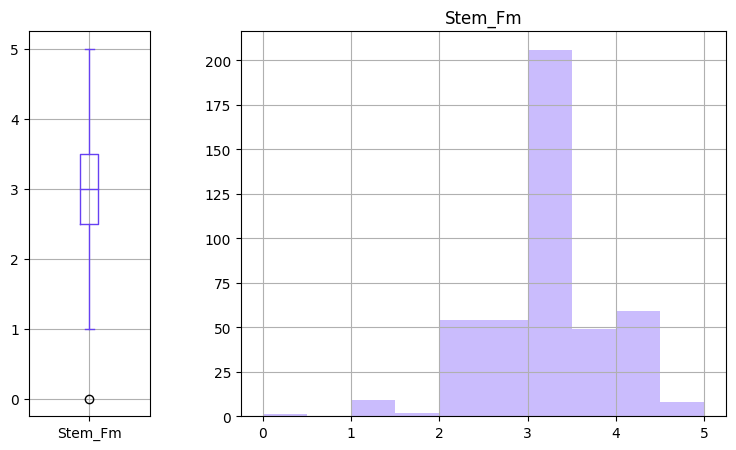

Stem_Fm -> Small outliers: 0 , Big outliers:  0


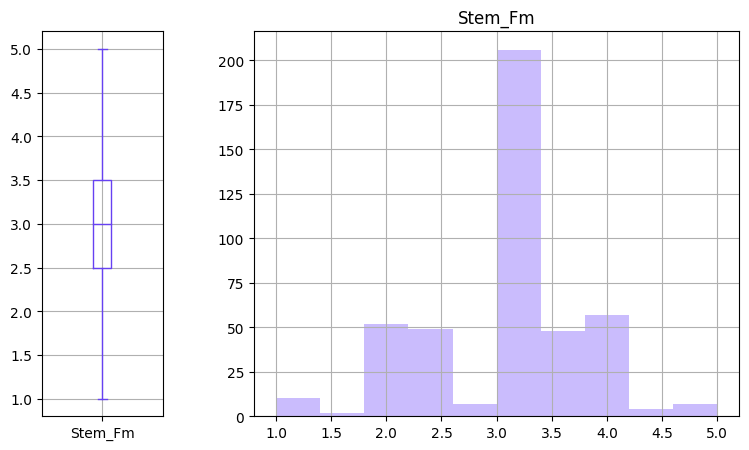

Crown_Fm -> Small outliers: 6 , Big outliers:  0


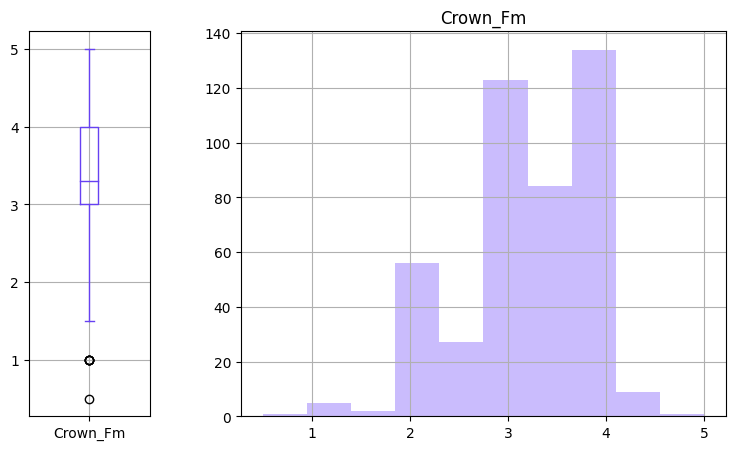

Crown_Fm -> Small outliers: 0 , Big outliers:  0


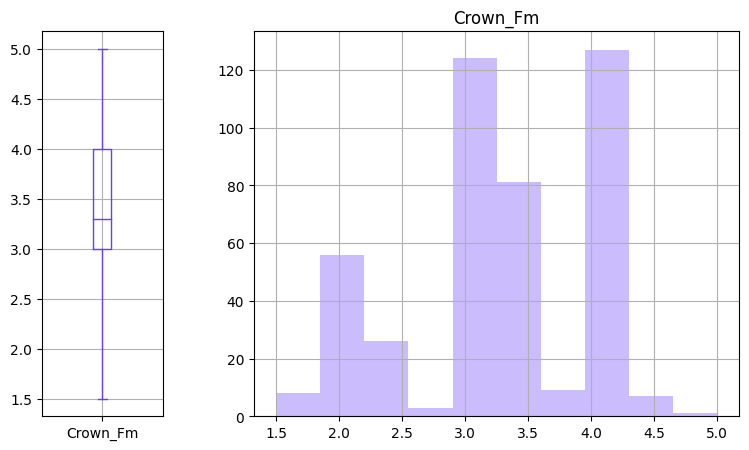

Brnch_Fm -> Small outliers: 18 , Big outliers:  1


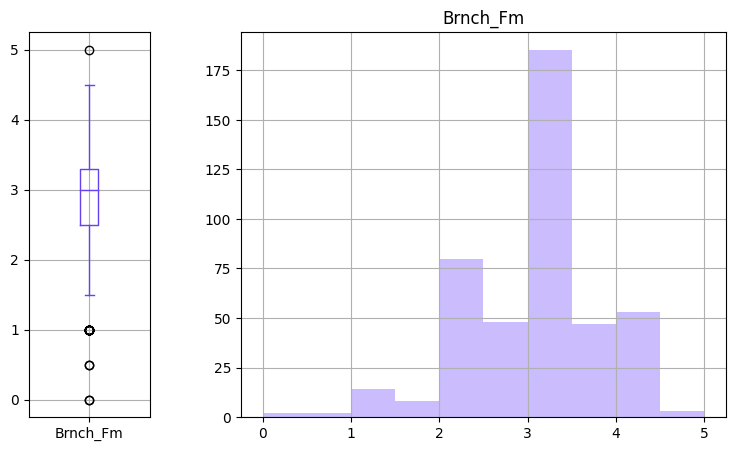

Brnch_Fm -> Small outliers: 0 , Big outliers:  0


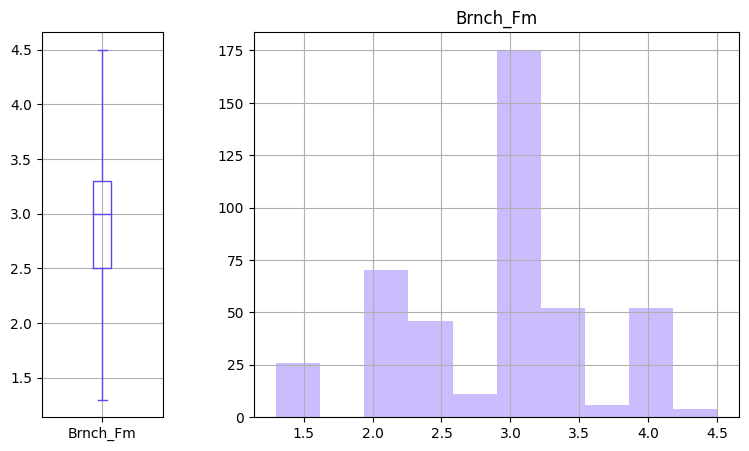

PMCno -> Small outliers: 0 , Big outliers:  0


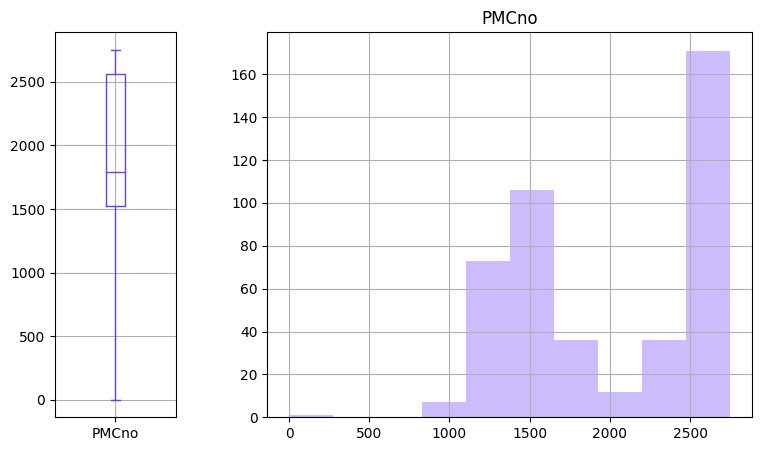

yes
yes
yes
Altitude -> Small outliers: 29 , Big outliers:  26


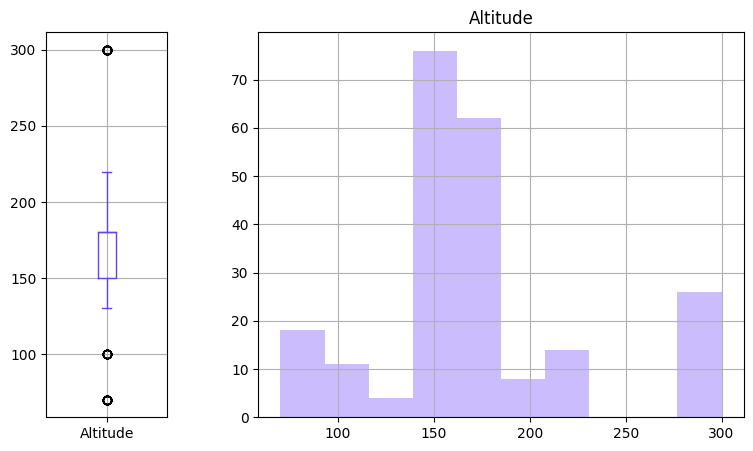

Altitude -> Small outliers: 0 , Big outliers:  0


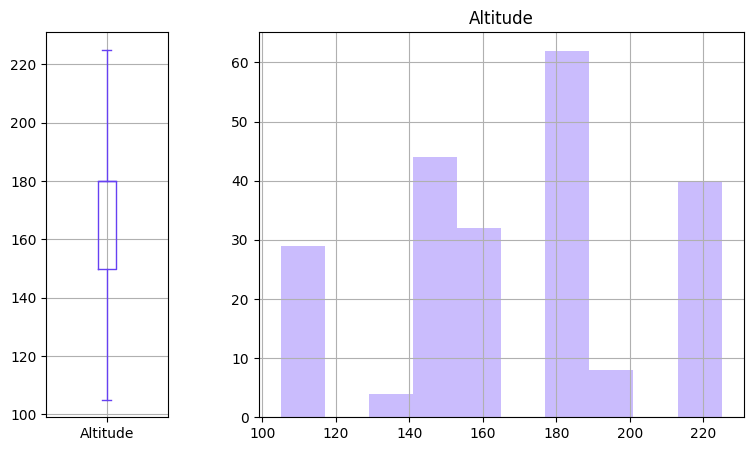

Rainfall -> Small outliers: 0 , Big outliers:  0


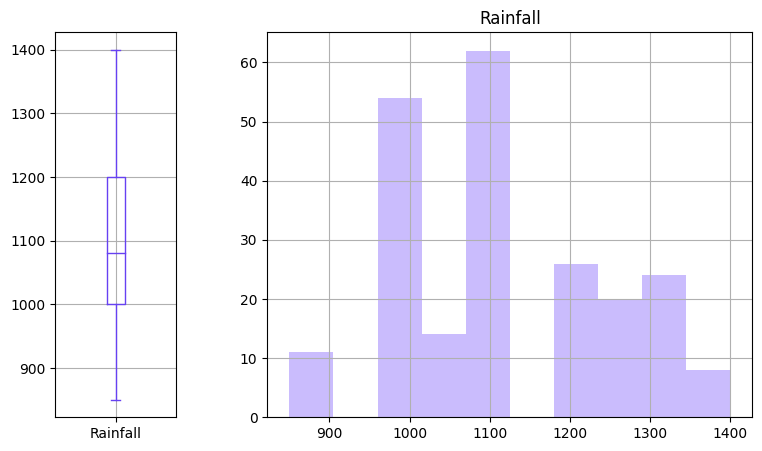

Frosts -> Small outliers: 0 , Big outliers:  0


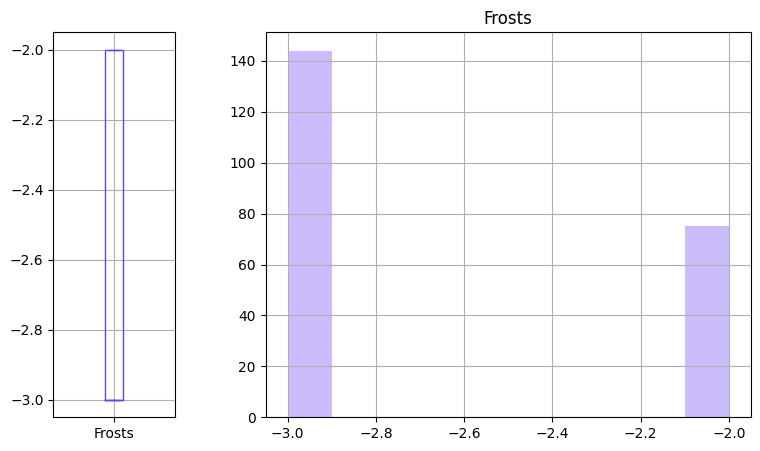

DBH -> Small outliers: 0 , Big outliers:  19


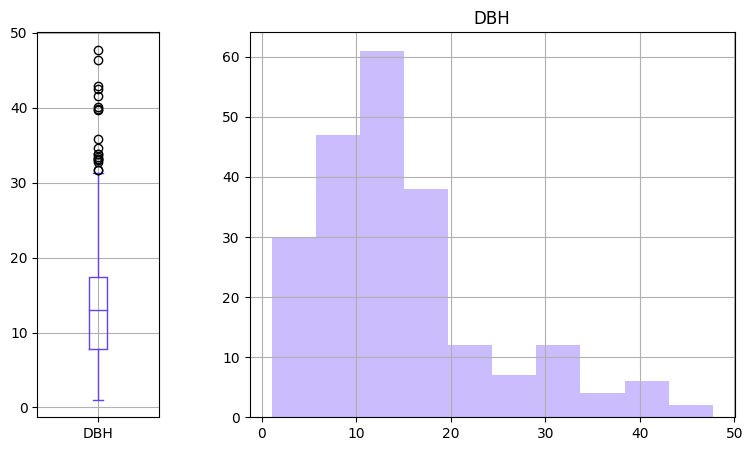

DBH -> Small outliers: 0 , Big outliers:  0


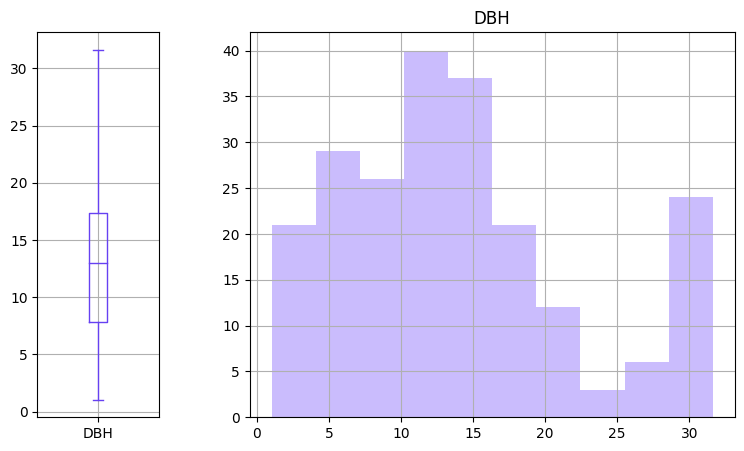

Ht -> Small outliers: 0 , Big outliers:  4


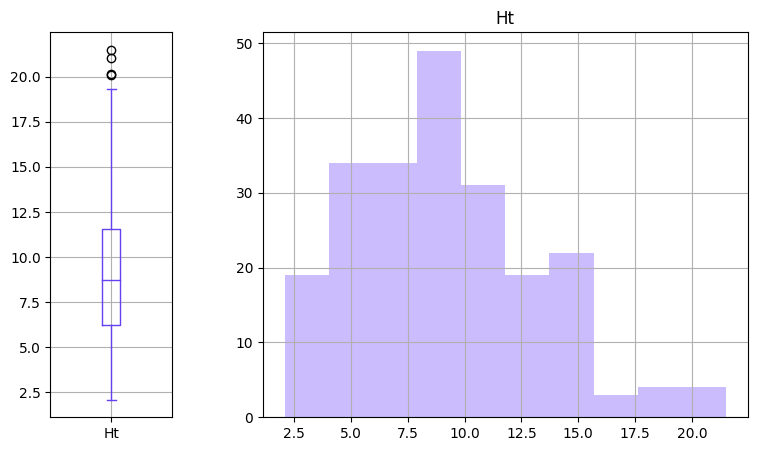

Ht -> Small outliers: 0 , Big outliers:  0


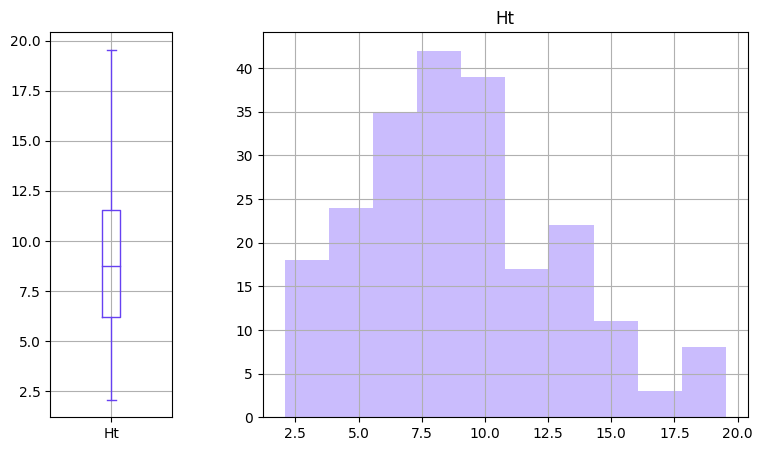

Surv -> Small outliers: 0 , Big outliers:  0


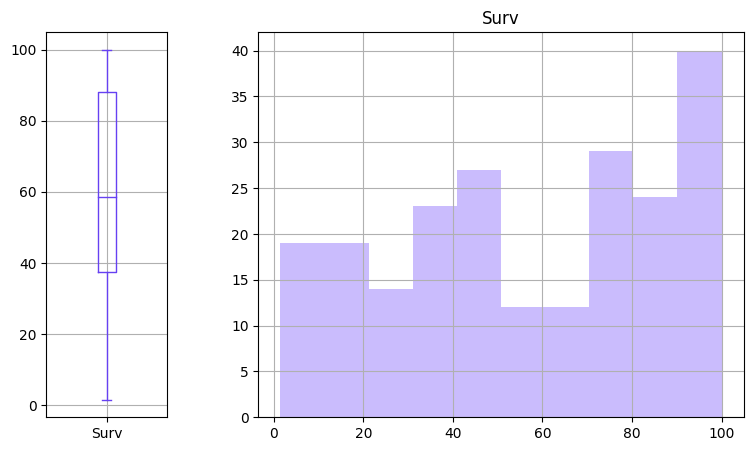

Vig -> Small outliers: 0 , Big outliers:  0


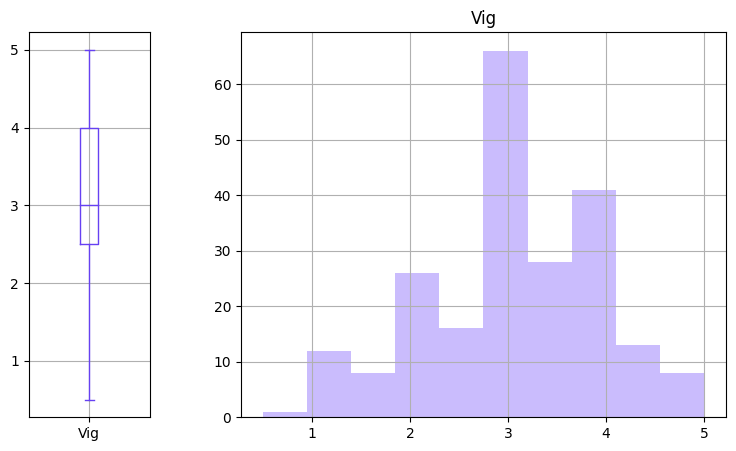

Ins_res -> Small outliers: 0 , Big outliers:  0


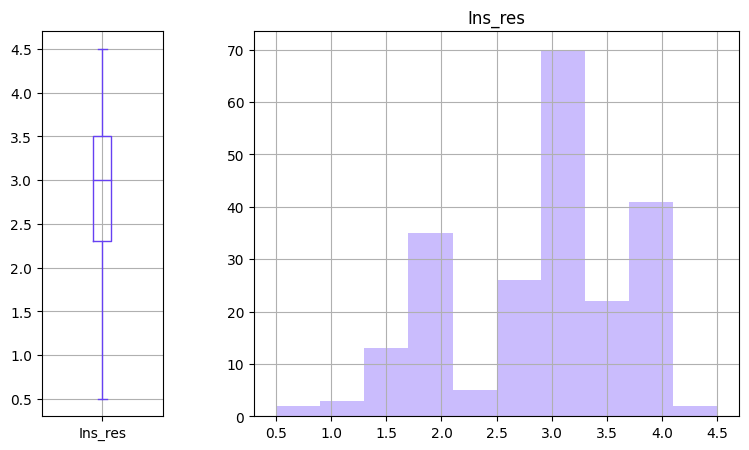

Stem_Fm -> Small outliers: 1 , Big outliers:  0


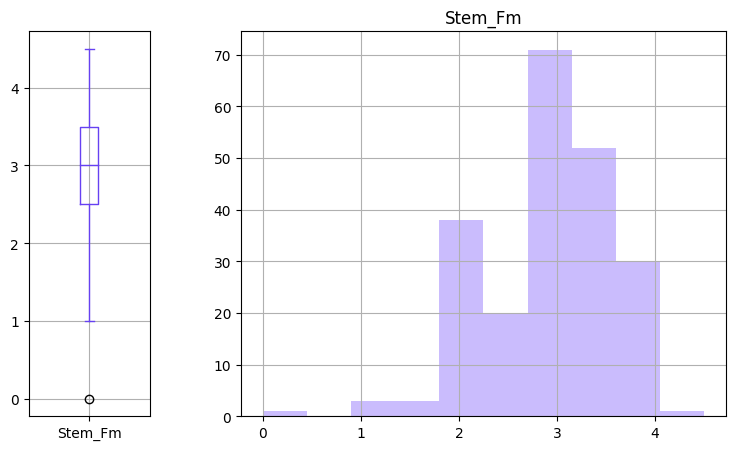

Stem_Fm -> Small outliers: 0 , Big outliers:  0


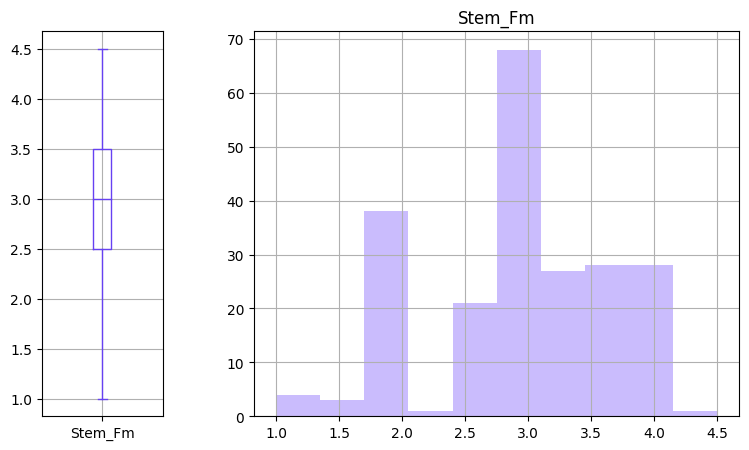

Crown_Fm -> Small outliers: 3 , Big outliers:  0


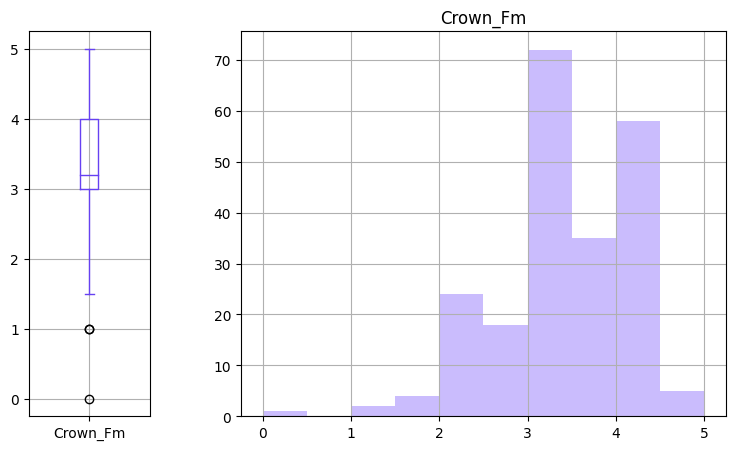

Crown_Fm -> Small outliers: 0 , Big outliers:  0


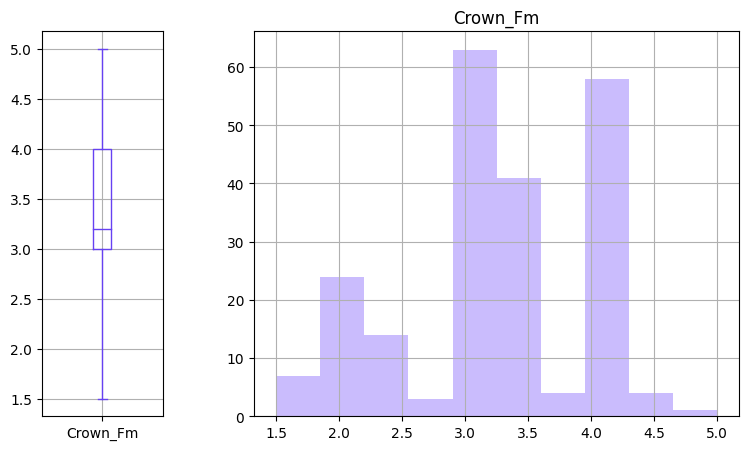

Brnch_Fm -> Small outliers: 12 , Big outliers:  0


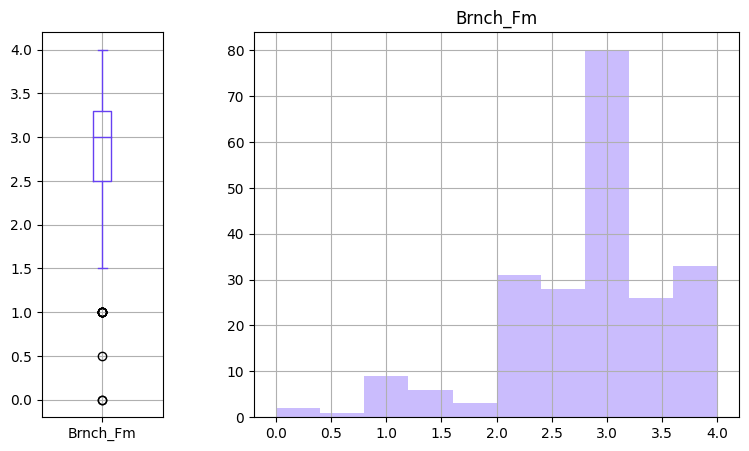

Brnch_Fm -> Small outliers: 0 , Big outliers:  0


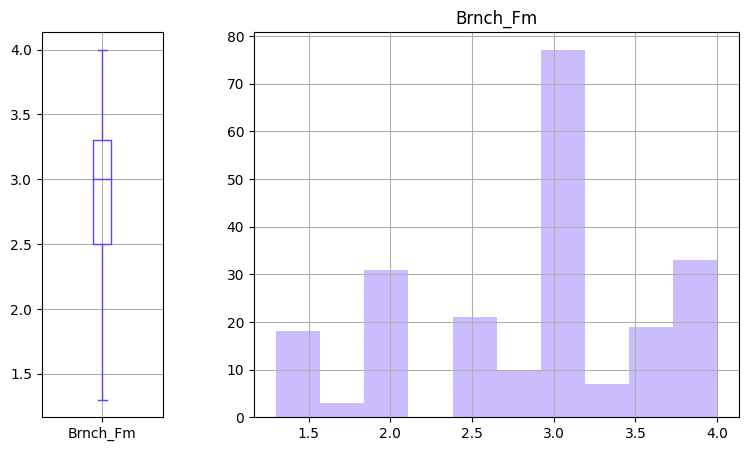

PMCno -> Small outliers: 0 , Big outliers:  0


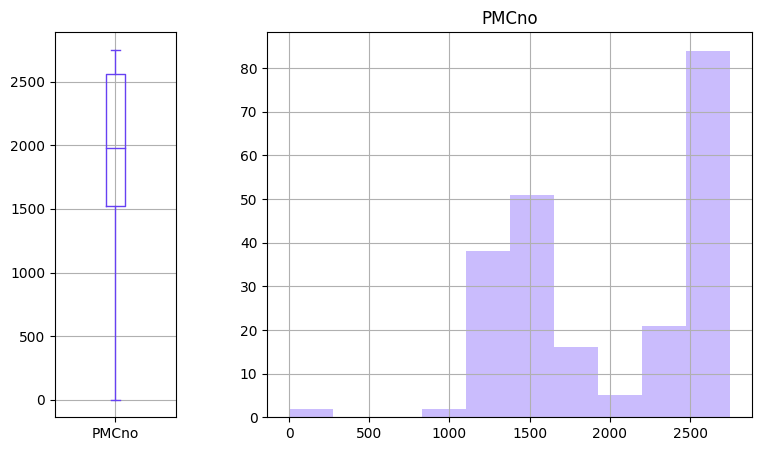

yes


In [81]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_2, y_2, test_size=0.33, stratify=y_2, random_state=42)
X_train_KNN, y_train_KNN, scaler  = preprocessing_data(X_train_KNN, y_train_KNN)
X_test_KNN, y_test_KNN, _ = preprocessing_data(X_test_KNN, y_test_KNN)

In [82]:
knn = KNeighborsClassifier()

X_train_KNN= convert_categorical_data(X_train_KNN)

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid={
        'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 50, 100],
        'metric': ['euclidean', 'minkowski', 'manhattan'],
        'weights': ['uniform', 'distance']
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit='f1_macro'
)

knn_cv.fit(X_train_KNN, y_train_KNN)
results_cv = pd.DataFrame(knn_cv.cv_results_)
cols = ['param_n_neighbors', 'param_metric', 'param_weights',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro',
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 50, 100],
                         'weights': ['uniform', 'distance']},
             refit='f1_macro',
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

,param_n_neighbors,param_metric,param_weights,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
39,3,manhattan,distance,0.312,0.284,0.295,0.308,0.036,0.042,0.030,0.049
41,5,manhattan,distance,0.310,0.283,0.296,0.299,0.037,0.046,0.051,0.048
36,1,manhattan,uniform,0.312,0.281,0.286,0.308,0.040,0.051,0.046,0.051
37,1,manhattan,distance,0.312,0.281,0.286,0.308,0.040,0.051,0.046,0.051
21,3,minkowski,distance,0.287,0.263,0.282,0.279,0.030,0.040,0.034,0.042
3,3,euclidean,distance,0.287,0.263,0.282,0.279,0.030,0.040,0.034,0.042
19,1,minkowski,distance,0.297,0.258,0.269,0.280,0.041,0.052,0.045,0.061
18,1,minkowski,uniform,0.297,0.258,0.269,0.280,0.041,0.052,0.045,0.061
0,1,euclidean,uniform,0.297,0.258,0.269,0.280,0.041,0.052,0.045,0.061
1,1,euclidean,distance,0.297,0.258,0.269,0.280,0.041,0.052,0.045,0.061


In [83]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights = 'distance')
knn.fit(X_train_KNN, y_train_KNN)

cross_val_results = pd.DataFrame(cross_validate(knn , X_train_KNN, y_train_KNN, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

results_df.loc['KNN_2',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291
SVM-default,0.132,0.059,0.014,0.032
SVM-best,0.378,0.401,0.367,0.042
KNN_2,0.312,0.284,0.295,0.308


In [84]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

#X_train_KNN= convert_categorical_data(X_train_KNN)
X_test_KNN = convert_categorical_data(X_test_KNN)

param_grid = {
    'n_estimators': [50, 100,200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf_model = RandomForestClassifier(random_state=42)
scoring_dict = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring=scoring_dict,
                           refit='f1_macro',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_KNN, y_train_KNN)
best_model = grid_search.best_estimator_

#predictions with the best hiperparameters
y_pred = best_model.predict(X_test_KNN)

print("\nConfusion matrix on test set:")
print(confusion_matrix(y_test_KNN, y_pred))

class_report = classification_report(y_test_KNN, y_pred, output_dict=True)

results_df.loc["Random_forest_BEST_2"] = [
    class_report['accuracy'],
    class_report['macro avg']['f1-score'],
    class_report['macro avg']['precision'],
    class_report['macro avg']['recall']
]
results_df



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1_macro',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'})


Confusion matrix on test set:
[[ 5  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  4  0  0  0  0  0  0  3  0  0  0  1  0  0  1  0  0]
 [ 0  0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  1  1  0  0  0  1  1  0  0  1  1  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  1  0  2  0  1  0  0  1  2  4  0]
 [ 2  0  0  0  0  0  2  3  0  1  0  2  1  0  3  0  2  1]
 [ 0  1  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  2]
 [ 5  0  0  1  0  0  0  2  0  9  0  0  0  1  3  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  1  1  0  2  1  2  0  1  1  0  3  0]
 [ 0  2  0  2  0  0  0  1  2  2  0  0  3  0  0  2  2  0]
 [ 0  0  0  0  0  1  0  0  0  0  3  0  0 15  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  1  2  0  1  0  0  3  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  2  6  0  3  0  0]
 [ 1  0  0  0  0  0  3  2  0  1  0  2  0  3  0  2 13  0]


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291
SVM-default,0.132,0.059,0.014,0.032
SVM-best,0.378,0.401,0.367,0.042
KNN_2,0.312,0.284,0.295,0.308
Random_forest_BEST_2,0.406,0.401,0.404,0.419


In [85]:
print(grid_search.best_params_)

{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


<Figure size 1000x700 with 0 Axes>

<Axes: >

Text(0.5, 47.7222222222222, 'Predicted Labels')

Text(95.72222222222221, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

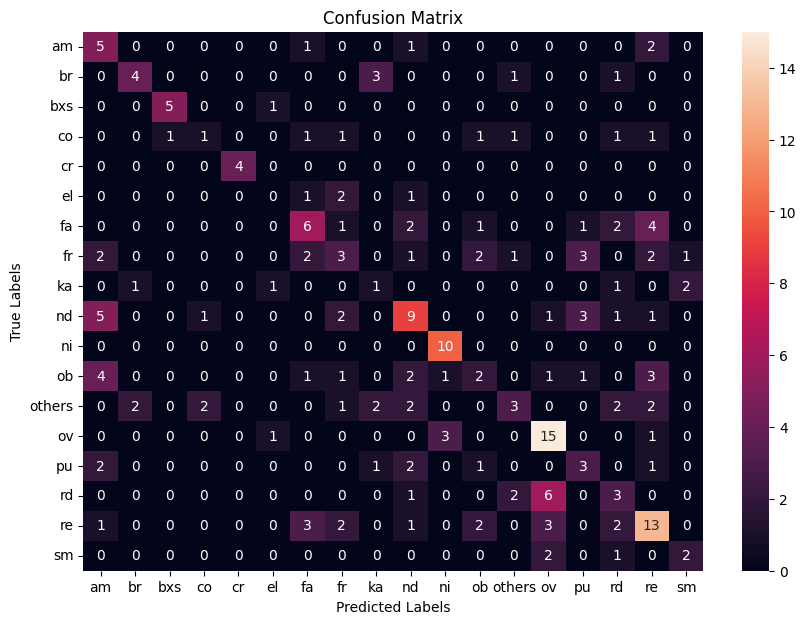

In [86]:
from matplotlib.colors import ListedColormap


pink_cmap = ListedColormap(['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093'])

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_KNN, y_pred), annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


#X_train_KNN= convert_categorical_data(X_train_KNN)
#X_test_KNN = convert_categorical_data(X_test_KNN)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_KNN, y_train_KNN)

means = pd.DataFrame(lda_model.means_)
means.columns= X_train_KNN.columns
means.index = lda_model.classes_

coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X_train_KNN.columns
coefs.index = lda_model.classes_

intercepts = pd.DataFrame(lda_model.intercept_)
intercepts.index = lda_model.classes_


print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

X_transformed = lda_model.transform(X_train_KNN)

X_transformed = pd.DataFrame(X_transformed)
X_transformed['labels'] = y_train_KNN.reset_index(drop=True)
y_pred = lda_model.predict(X_test_KNN)


class_report = classification_report(y_test_KNN, y_pred, output_dict=True)

results_df.loc["LDA 2"] = [
    class_report['accuracy'],
    class_report['macro avg']['f1-score'],
    class_report['macro avg']['precision'],
    class_report['macro avg']['recall']
]

results_df

LinearDiscriminantAnalysis()

Explained Variance Ratio


,0
0,4.021e-01
1,1.691e-01
2,1.245e-01
3,8.369e-02
4,7.039e-02
5,4.543e-02
6,3.351e-02
7,1.908e-02
8,1.405e-02
9,1.211e-02


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291
SVM-default,0.132,0.059,0.014,0.032
SVM-best,0.378,0.401,0.367,0.042
KNN_2,0.312,0.284,0.295,0.308
Random_forest_BEST_2,0.406,0.401,0.404,0.419
LDA 2,0.356,0.316,0.334,0.325


In [88]:
init_time = time()

svm = SVC(class_weight='balanced')

kernels = ['linear', 'rbf', 'poly']
Cs = [0.1, 0.001, 0.5, 1, 2, 3, 4, 5, 6, 0.0001]


trc = GridSearchCV(estimator=svm,
                   param_grid={
                       'C': Cs,
                       'kernel': kernels
                   },
                   scoring=['accuracy', 'recall_macro', 'f1_macro'],
                   cv=5,
                   return_train_score=True,
                   refit='f1_macro')

model_5CV = trc.fit(X_train_KNN, y_train_KNN)
print(timedelta(seconds=(time() - init_time)))

model_5CV.best_score_
model_5CV.best_params_

0:00:07.419752


0.30182861294574403

{'C': 3, 'kernel': 'linear'}

In [89]:
init_time = time()
svm = SVC(kernel='linear',class_weight='balanced', C=3)
svm.fit(X_train_KNN,y_train_KNN)

training_time = time()-init_time
print(timedelta(seconds=training_time))

scores = cross_val_score(svm, X_train_KNN, y_train_KNN, cv=5)
scores_recall = cross_val_score(svm, X_train_KNN, y_train_KNN, cv=5,scoring='recall_macro')
scores_f_score = cross_val_score(svm, X_train_KNN, y_train_KNN, cv=5,scoring='f1_macro')
results_df.loc['SVM-best 2',:] = [np.mean(scores),np.mean(scores_recall),np.mean(scores_f_score),training_time]
results_df

SVC(C=3, class_weight='balanced', kernel='linear')

0:00:00.049384


,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro
Random_forest_DF,0.485,0.480,0.503,0.493
Random_forest,0.495,0.520,0.522,0.546
Random_forest with SMOTE,0.446,0.459,0.465,0.496
LDA,0.371,0.329,0.364,0.340
KNN,0.334,0.284,0.303,0.291
SVM-default,0.132,0.059,0.014,0.032
SVM-best,0.378,0.401,0.367,0.042
KNN_2,0.312,0.284,0.295,0.308
Random_forest_BEST_2,0.406,0.401,0.404,0.419
LDA 2,0.356,0.316,0.334,0.325
